# EXPLORATORY DATA ANALYSIS  (Résultats_Bacc_Toamasina_2023)

liens: https://bacc.univ-toamasina.mg

### I. Introduction :

 Dans le compte rendu qui suit, nous aborderons l'Exploration des Données (EDA) du site des résultats du baccalauréat à Toamasina, Madagascar. Ce site présente les élèves de toutes les filières à Madagascar ayant réussi leur baccalauréat, en indiquant toutes leurs informations d'identification ainsi que les mentions qu'ils ont obtenues. Notre objectif principal est d'explorer et de comprendre ces données afin d'en extraire des informations pertinentes, tout en effectuant les nettoyages nécessaires.

Préparation :

Pour commencer, nous importerons les bibliothèques nécessaires et téléchargerons le fichier requis pour notre analyse exploratoire des données.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
#importation du fichier depuis drive
!gdown https://drive.google.com/u/0/uc?id=1cIHMGS6fFOGGvABZFjRKidztcMDlna_A

Downloading...
From: https://drive.google.com/u/0/uc?id=1cIHMGS6fFOGGvABZFjRKidztcMDlna_A
To: /content/baccalaureat.csv
100% 1.76M/1.76M [00:00<00:00, 165MB/s]


In [ ]:
data = pd.read_csv('baccalaureat.csv')

### II. EXPLORATORY DATA ANALYSIS:
  ### II-1. Examination et Compréhension des Données
Passons maintenant à l'examen approfondi et à la compréhension des données extraites du site des résultat de baccalaureat de toamasina. Cette phase cruciale de l'analyse exploratoire vise à dévoiler les caractéristiques essentielles des informations recueillies et à fournir des insights significatifs.

#### Exploration des variables :

Au cours de cette étape, nous allons identifier les variables clés, examiner la distribution des données et repérer d'éventuelles tendances ou "outliers". Cela nous permettra d'acquérir une vision plus précise de la nature des données à notre disposition.

##  1- Analyse du tableau

In [ ]:
#copie du données
df = data.copy()

In [ ]:
df.shape

(19879, 7)

Le tableau sous examen est composé de 19,879 lignes et 7 colonnes.

In [ ]:
df.head()

Numéro               Nom          Prénoms Série   Mention       Centre  \
0  142 0000  ANDRIANANTENAINA     Rija Evarist    A1  Passable  TOAMASINA I   
1  142 0001         NALAHATRA  Tahina Francice    A1  Passable  TOAMASINA I   
2  142 0002           RAJOSOA    Eugene Whilly    A1  Passable  TOAMASINA I   
3  142 0003       RAMANOELINA           Zinolà    A1  Passable  TOAMASINA I   
4  142 0004  RANDRIAMANANTENA    Jacques Marco    A1  Passable  TOAMASINA I   

      Etablissement  
0  Lycée Foulpointe  
1  Lycée Foulpointe  
2  Lycée Foulpointe  
3  Lycée Foulpointe  
4  Lycée Foulpointe

### 1-1 Identification de la variable cible :

Notre variable cible est la mention obtenue par les étudiants au baccalauréat. En utilisant cette variable, nous pouvons prédire, en saisissant les noms, numéros et le centre d'examen, à quelle mention l'étudiant est associé.

Passons maintenant à l'identification des types de variables présentes dans le tableau de données.

In [ ]:
df.dtypes

Numéro           object
Nom              object
Prénoms          object
Série            object
Mention          object
Centre           object
Etablissement    object
dtype: object

C'est notable que tout nos variables sont qualitatives.

### 1.2 Analyse de valeurs manquantes

<Axes: >

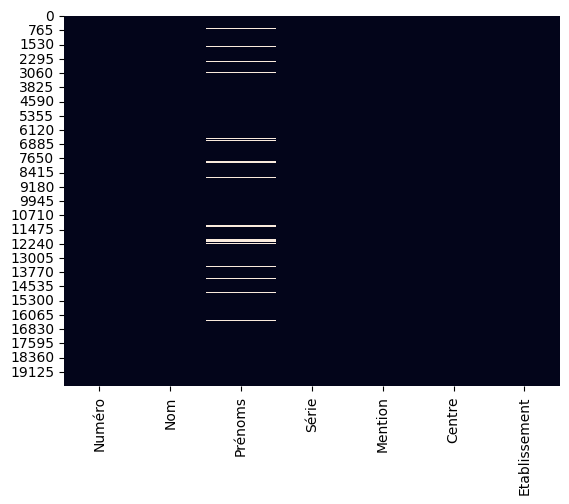

In [ ]:
#verification de valeurs manquantes
sns.heatmap(df.isna(),cbar=False)

Il est à noter qu'il existe quelques valeurs manquantes, principalement dans la variable des prénoms. Cependant, dans l'ensemble, nous constatons une abondance de données.

In [ ]:
df.isna().sum()/df.shape[0]

Numéro           0.000000
Nom              0.000000
Prénoms          0.035615
Série            0.000000
Mention          0.000000
Centre           0.000000
Etablissement    0.000000
dtype: float64

Précisément, nous observons que la colonne prénoms présente seulement 35% de données manquantes. Et pourtant cela n'as pas d' influance sur notre données.

### 1.3 Analyse de fonds

#### a.Analyse de target :

Nous allons sélectionner la colonne 'Mention' comme notre variable cible, car il est tout à fait possible de prédire cette dernière grâce aux données dont nous disposons.

##### Mention :

In [ ]:
df['Mention'].value_counts(normalize=True)

Passable      0.811761
Assez bien    0.171840
Bien          0.015645
Très bien     0.000755
Name: Mention, dtype: float64

<Axes: ylabel='Mention'>

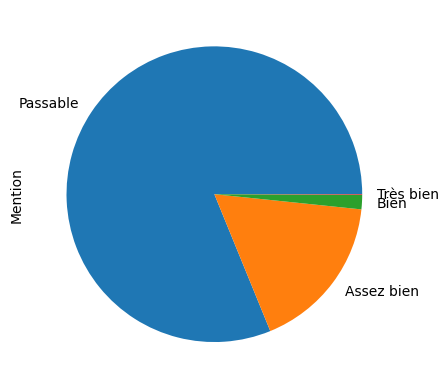

In [ ]:
df['Mention'].value_counts(normalize=True).plot.pie()

Ce tableau semble très vaste, et dans une vue d'ensemble, peu d'élèves ont obtenu la mention 'Très Bien', la plupart, plus précisément 81%, ont obtenu la mention 'Passable'. Le taux d'étudiants ayant obtenu la mention 'Très Bien' est très bas, même inférieur à 1%. Ces chiffres suggèrent que le niveau d'éducation semble encore faible à Madagascar, ce qui est également illustré par le nombre d'élèves ayant obtenu la mention 'Bien'.

In [ ]:
df['Mention'].describe()

count        19879
unique           4
top       Passable
freq         16137
Name: Mention, dtype: object

Dans l'ensemble, le tableau indique que l'ensemble de données comprend 19,879 entrées, dont 4 sont uniques. La valeur la plus fréquente dans l'ensemble de données est la mention 'Passable', qui apparaît 16,137 fois. Cependant, ces statistiques préliminaires ne sont qu'une première étape. Par la suite, nous allons analyser plus en détail les relations entre les différentes mentions et nos variables cibles.

## 2-Signification des nos variables
 #### 2-1 Variables qualitatives

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

Numéro--------------------------------------------['142 0000' '142 0001' '142 0002' ... '956 0174' '956 0176' '956 0177']
Nom-----------------------------------------------['ANDRIANANTENAINA' 'NALAHATRA' 'RAJOSOA' ... 'BOTOUTALA'
 'RAMANAMPISOA VOLOLONIAINA' 'IGNARAKA']
Prénoms-------------------------------------------['Rija Evarist' 'Tahina Francice' 'Eugene Whilly' ... 'Jeudinot Franki'
 'José Christalino' 'Jose Grazielo']
Série---------------------------------------------['A1' 'A2' 'ACTC' 'C' 'CCBTP' 'CG' 'D' 'L' 'MEMA' 'OSE' 'PCBTP' 'S' 'SS'
 'TAG' 'TAMB' 'TEV' 'TFFI' 'TGC' 'TGI' 'TMA' 'TMEL' 'TOM' 'TPFM' 'TTER']
Mention-------------------------------------------['Passable' 'Assez bien' 'Bien' 'Très bien']
Centre--------------------------------------------['TOAMASINA I' 'AMBATONDRAZAKA' 'AMPARAFARAVOLA' 'MORARANO CHROME'
 'TANAMBE' 'ANDILAMENA' "ANOSIBE AN'ALA" 'ANTANAMBAO MANAMPOTSY'
 'VOHIBINANY (BRICKAVILLE)' 'FENERIVE-EST' 'VOHILENGO' 'MAHANORO'
 'MANANARA AVARATRA' 'MAROANTSE

La compréhension pourrait être améliorée en analysant chaque colonne individuellement. Plongeons plus profondément dans les détails.

In [ ]:
df.nunique()

Numéro           19879
Nom              10219
Prénoms          16129
Série               24
Mention              4
Centre              22
Etablissement      275
dtype: int64

Puisque les noms, prénoms et numéros sont tous  des identifiants uniques. Notre analyse débutera en se concentrant sur les colonnes 'Série', 'Mention' et 'Centre d'Établissement', qui sont susceptibles de fournir des insights significatifs compte tenu de leur nature spécifique à la réussite du baccalauréat

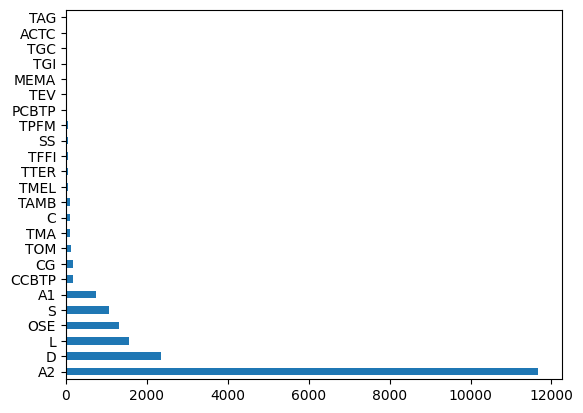

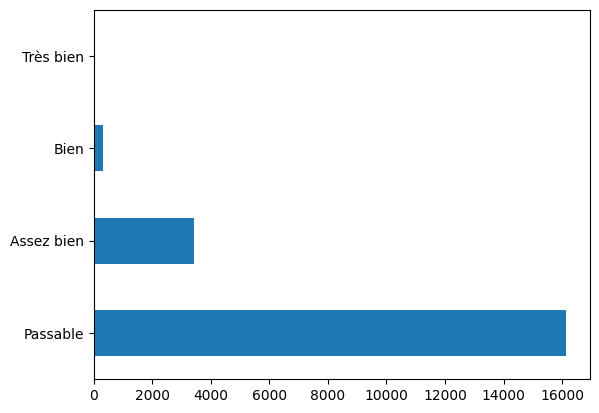

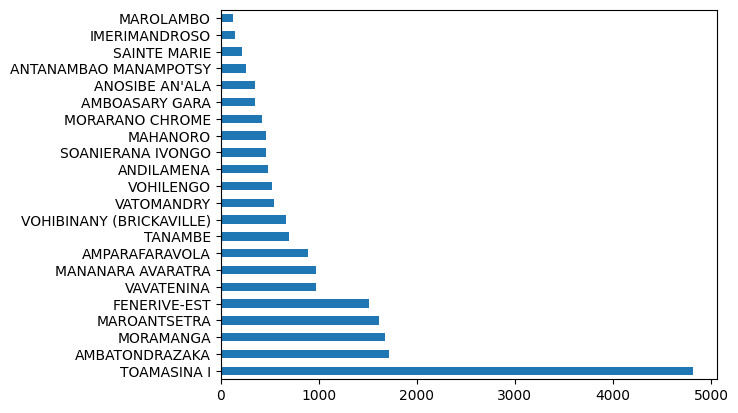

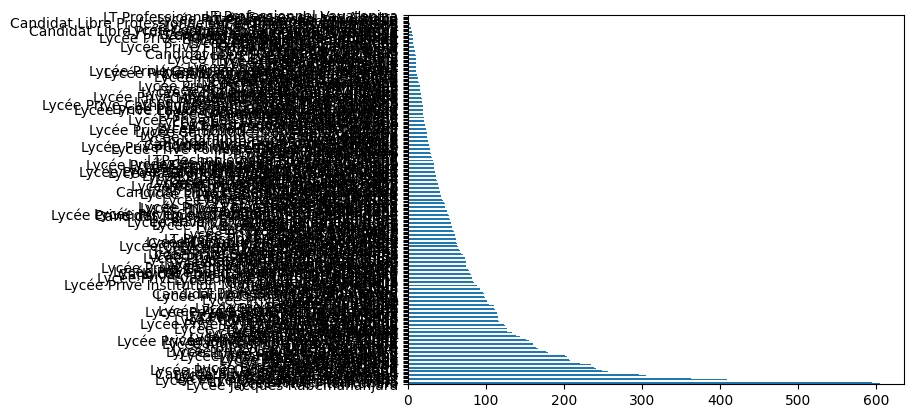

In [ ]:
for col in ["Série","Mention","Centre","Etablissement"]:
    plt.figure()
    df[col].value_counts().plot(kind="barh")

Tout semble très intéressant, cependant, dans la vue d'ensemble, la lecture de la colonne 'Établissement' peut s'avérer difficile. Par conséquent, examinons chaque colonne individuellement. Le réglage de la taille de la figure semble compliqué pour certaines d'entre elles(dans la vue d'ensemble).

#### 2-2Analyse de chaque variable caractéristique:


 ##### Série:

In [ ]:
df["Série"].describe()

count     19879
unique       24
top          A2
freq      11670
Name: Série, dtype: object

Dans l'ensemble
Le tableau indique que l'ensemble de données contient 19879 valeurs, dont 24 sont uniques. La valeur la plus courante dans l'ensemble de données est A2, qui apparaît 11670 fois. Cela signifie que A2 représente 58,9 % de toutes les valeurs dans l'ensemble de données.

En termes concrets, cela signifie que sur 100 valeurs dans l'ensemble de données, 59 sont A2.

In [ ]:
(df["Série"].value_counts(normalize=True)).sort_values(ascending=True)

TAG      0.000050
ACTC     0.000201
TGC      0.000252
TGI      0.000453
MEMA     0.000855
TEV      0.000855
PCBTP    0.002062
TPFM     0.002415
SS       0.002515
TFFI     0.002666
TTER     0.002867
TMEL     0.003119
TAMB     0.005081
C        0.005383
TMA      0.005785
TOM      0.006338
CG       0.009155
CCBTP    0.009256
A1       0.037527
S        0.053222
OSE      0.065748
L        0.078525
D        0.118618
A2       0.587052
Name: Série, dtype: float64

<Axes: ylabel='Série'>

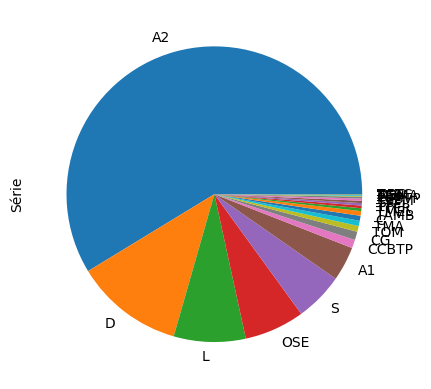

In [ ]:
df["Série"].value_counts().plot.pie()

Selon le schéma et le tableau ci-dessus, il serait judicieux de regrouper les données. Nous savons que les séries du baccalauréat à Madagascar peuvent être catégorisées, avec les séries A1, A2, C et D en parallèle avec les nouvelles séries L, S et OSE. Procédons à leur classification dans les colonnes correspondantes

In [ ]:
#creation des nouveaux colonnes :
Scientifique=["C","D","S"]
Littéraire=["A1","L","A2"]
OSE=["OSE"]
Technique=[]

def categorie(x):
    if x in Scientifique:
        return "Scientifique"
    elif x in Littéraire :
        return "Littéraire"
    elif x in OSE:
        return "OSE"
    else:
        return "Technique"

df["Catégorie"] = df["Série"].apply(categorie)


In [ ]:
df["Catégorie"].unique()

array(['Littéraire', 'Technique', 'Scientifique', 'OSE'], dtype=object)

In [ ]:
df.head()

Numéro               Nom          Prénoms Série   Mention       Centre  \
0  142 0000  ANDRIANANTENAINA     Rija Evarist    A1  Passable  TOAMASINA I   
1  142 0001         NALAHATRA  Tahina Francice    A1  Passable  TOAMASINA I   
2  142 0002           RAJOSOA    Eugene Whilly    A1  Passable  TOAMASINA I   
3  142 0003       RAMANOELINA           Zinolà    A1  Passable  TOAMASINA I   
4  142 0004  RANDRIAMANANTENA    Jacques Marco    A1  Passable  TOAMASINA I   

      Etablissement   Catégorie  
0  Lycée Foulpointe  Littéraire  
1  Lycée Foulpointe  Littéraire  
2  Lycée Foulpointe  Littéraire  
3  Lycée Foulpointe  Littéraire  
4  Lycée Foulpointe  Littéraire

<Axes: ylabel='Catégorie'>

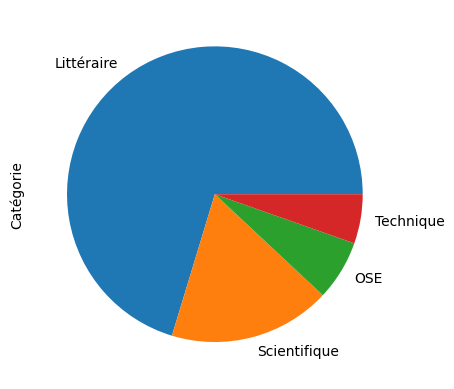

In [ ]:
df["Catégorie"].value_counts().plot.pie()

In [ ]:
df["Catégorie"].describe()

count          19879
unique             4
top       Littéraire
freq           13977
Name: Catégorie, dtype: object

Dans son ensemble, le tableau révèle que le tableau de données compte 19 879 valeurs, dont 4 sont uniques. La catégorie la plus fréquente dans l'ensemble des données est la série littéraire, qui se manifeste 13 977 fois. Cela implique que les étudiants en littérature représentent 70% de toutes les occurrences dans l'ensemble de données

In [ ]:
df["Catégorie"].value_counts(normalize=True , ascending =True)

Technique       0.053926
OSE             0.065748
Scientifique    0.177222
Littéraire      0.703104
Name: Catégorie, dtype: float64

On constate que seulement 17% des étudiants à Toamasina ont obtenu le baccalauréat scientifique, un pourcentage relativement bas. Cependant, il est important de noter que ce chiffre ne semble pas être le minimum, car seulement 5% des étudiants se sont orientés vers les domaines techniques. Il est à souligner que les étudiants en technique sont globalement moins nombreux à Madagascar, bien que notre analyse englobe tous les types de baccalauréat. La majorité des étudiants semblent être orientés vers les filières littéraires. Cependant, il est également à noter que certains étudiants choisissent de passer deux fois le baccalauréat, c'est-à-dire dans les filières scientifiques et littéraires simultanément. Par conséquent, il est difficile de conclure sur le pourcentage spécifique des étudiants dans ces deux domaines. De plus, les étudiants optant pour la filière OSE semblent être moins nombreux. En résumé, bien qu'il existe de nombreux types dans le domaine technique, il occupe la part minimale dans le tableau.

#### Numéro :

In [ ]:
df['Numéro'].describe()

count        19879
unique       19879
top       142 0000
freq             1
Name: Numéro, dtype: object

Le numéro est de type objet, figurant en haut de la colonne, et chaque valeur dans cette variable est unique, ne se répétant qu'une seule fois. Il s'agit d'un identifiant unique attribué à chaque étudiant

Passons maintenant à l'analyse de la colonne 'Centre', autrement dit, le lieu où les élèves ont passé leur baccalauréat.

#### Centre :

In [ ]:
df["Centre"].value_counts(normalize=True, ascending =True)

MAROLAMBO                   0.006389
IMERIMANDROSO               0.007244
SAINTE MARIE                0.010966
ANTANAMBAO MANAMPOTSY       0.012777
ANOSIBE AN'ALA              0.017405
AMBOASARY GARA              0.017657
MORARANO CHROME             0.021027
SOANIERANA IVONGO           0.023392
MAHANORO                    0.023392
ANDILAMENA                  0.024498
VOHILENGO                   0.026460
VATOMANDRY                  0.027265
VOHIBINANY (BRICKAVILLE)    0.033402
TANAMBE                     0.035213
AMPARAFARAVOLA              0.044620
MANANARA AVARATRA           0.049097
VAVATENINA                  0.049097
FENERIVE-EST                0.076060
MAROANTSETRA                0.081040
MORAMANGA                   0.084310
AMBATONDRAZAKA              0.086373
TOAMASINA I                 0.242316
Name: Centre, dtype: float64

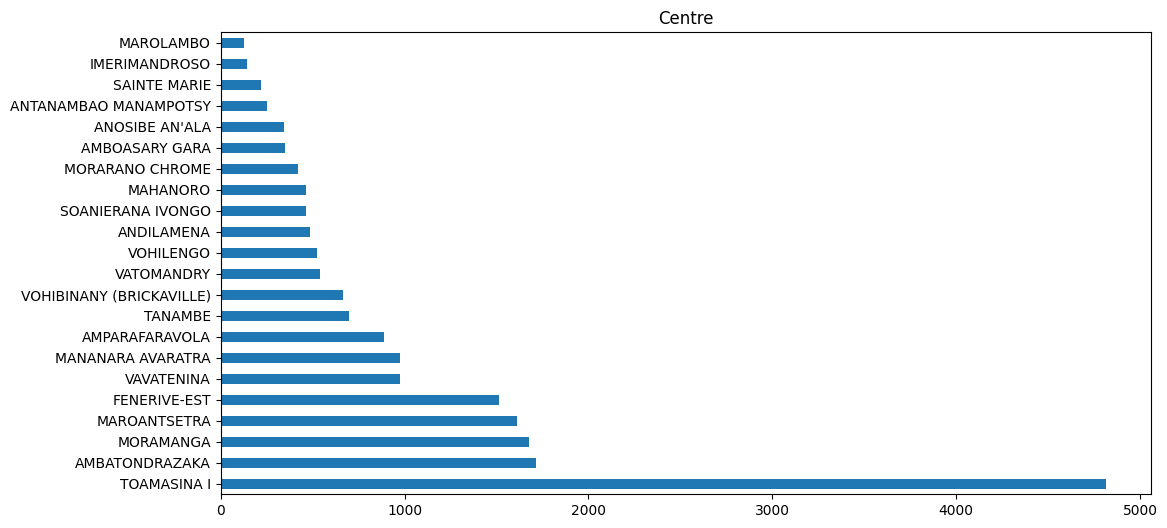

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Centre")
df['Centre'].value_counts().plot(kind="barh")
plt.show()


On constate une concentration significative de données dans la partie Toamasina I, ce qui est compréhensible étant donné que c'est le centre-ville. Les étudiants sont répartis de manière assez uniforme, mais dans la région de Marolambo, le nombre d'étudiants est relativement faible, ce qui semble normal étant donné la population limitée de cette zone de Toamasina. Certaines villes restent dans l'intervalle de confiance de la moyenne.

In [ ]:
df.head()

Numéro               Nom          Prénoms Série   Mention       Centre  \
0  142 0000  ANDRIANANTENAINA     Rija Evarist    A1  Passable  TOAMASINA I   
1  142 0001         NALAHATRA  Tahina Francice    A1  Passable  TOAMASINA I   
2  142 0002           RAJOSOA    Eugene Whilly    A1  Passable  TOAMASINA I   
3  142 0003       RAMANOELINA           Zinolà    A1  Passable  TOAMASINA I   
4  142 0004  RANDRIAMANANTENA    Jacques Marco    A1  Passable  TOAMASINA I   

      Etablissement   Catégorie  
0  Lycée Foulpointe  Littéraire  
1  Lycée Foulpointe  Littéraire  
2  Lycée Foulpointe  Littéraire  
3  Lycée Foulpointe  Littéraire  
4  Lycée Foulpointe  Littéraire

#### Etablissement :

On va poursuivre notre analyse avec la colonne "Etablissement".

In [ ]:
df['Etablissement'].describe()

count                           19879
unique                            275
top       Lycée Jacques Rabemananjara
freq                              605
Name: Etablissement, dtype: object

Ainsi, on observe qu'il y a 275 types d'établissements dans le tableau, le lycée Jacques Rabemananjara étant le plus fréquent avec une présence de 675 occurrences

In [ ]:
df['Etablissement'].value_counts(normalize=True, ascending=True)

LT Professionnel Privé Meva                   0.000050
LT Professionnel Les Genies du Lac Alaotra    0.000050
Lycée Privé Ny Havako Andondabe               0.000050
LT Professionnel Vavatenina                   0.000050
LT Professionnel Privé CTR                    0.000101
                                                ...   
Lycée Fénérive-Est                            0.018260
Lycée Privé Catholique Stella Maris           0.020574
LT Professionnel Toamasina                    0.023190
Lycée Privé Fitarikandro                      0.029931
Lycée Jacques Rabemananjara                   0.030434
Name: Etablissement, Length: 275, dtype: float64

La lecture peut être complexe. Approfondissons davantage pour obtenir plus d'informations."







<Axes: >

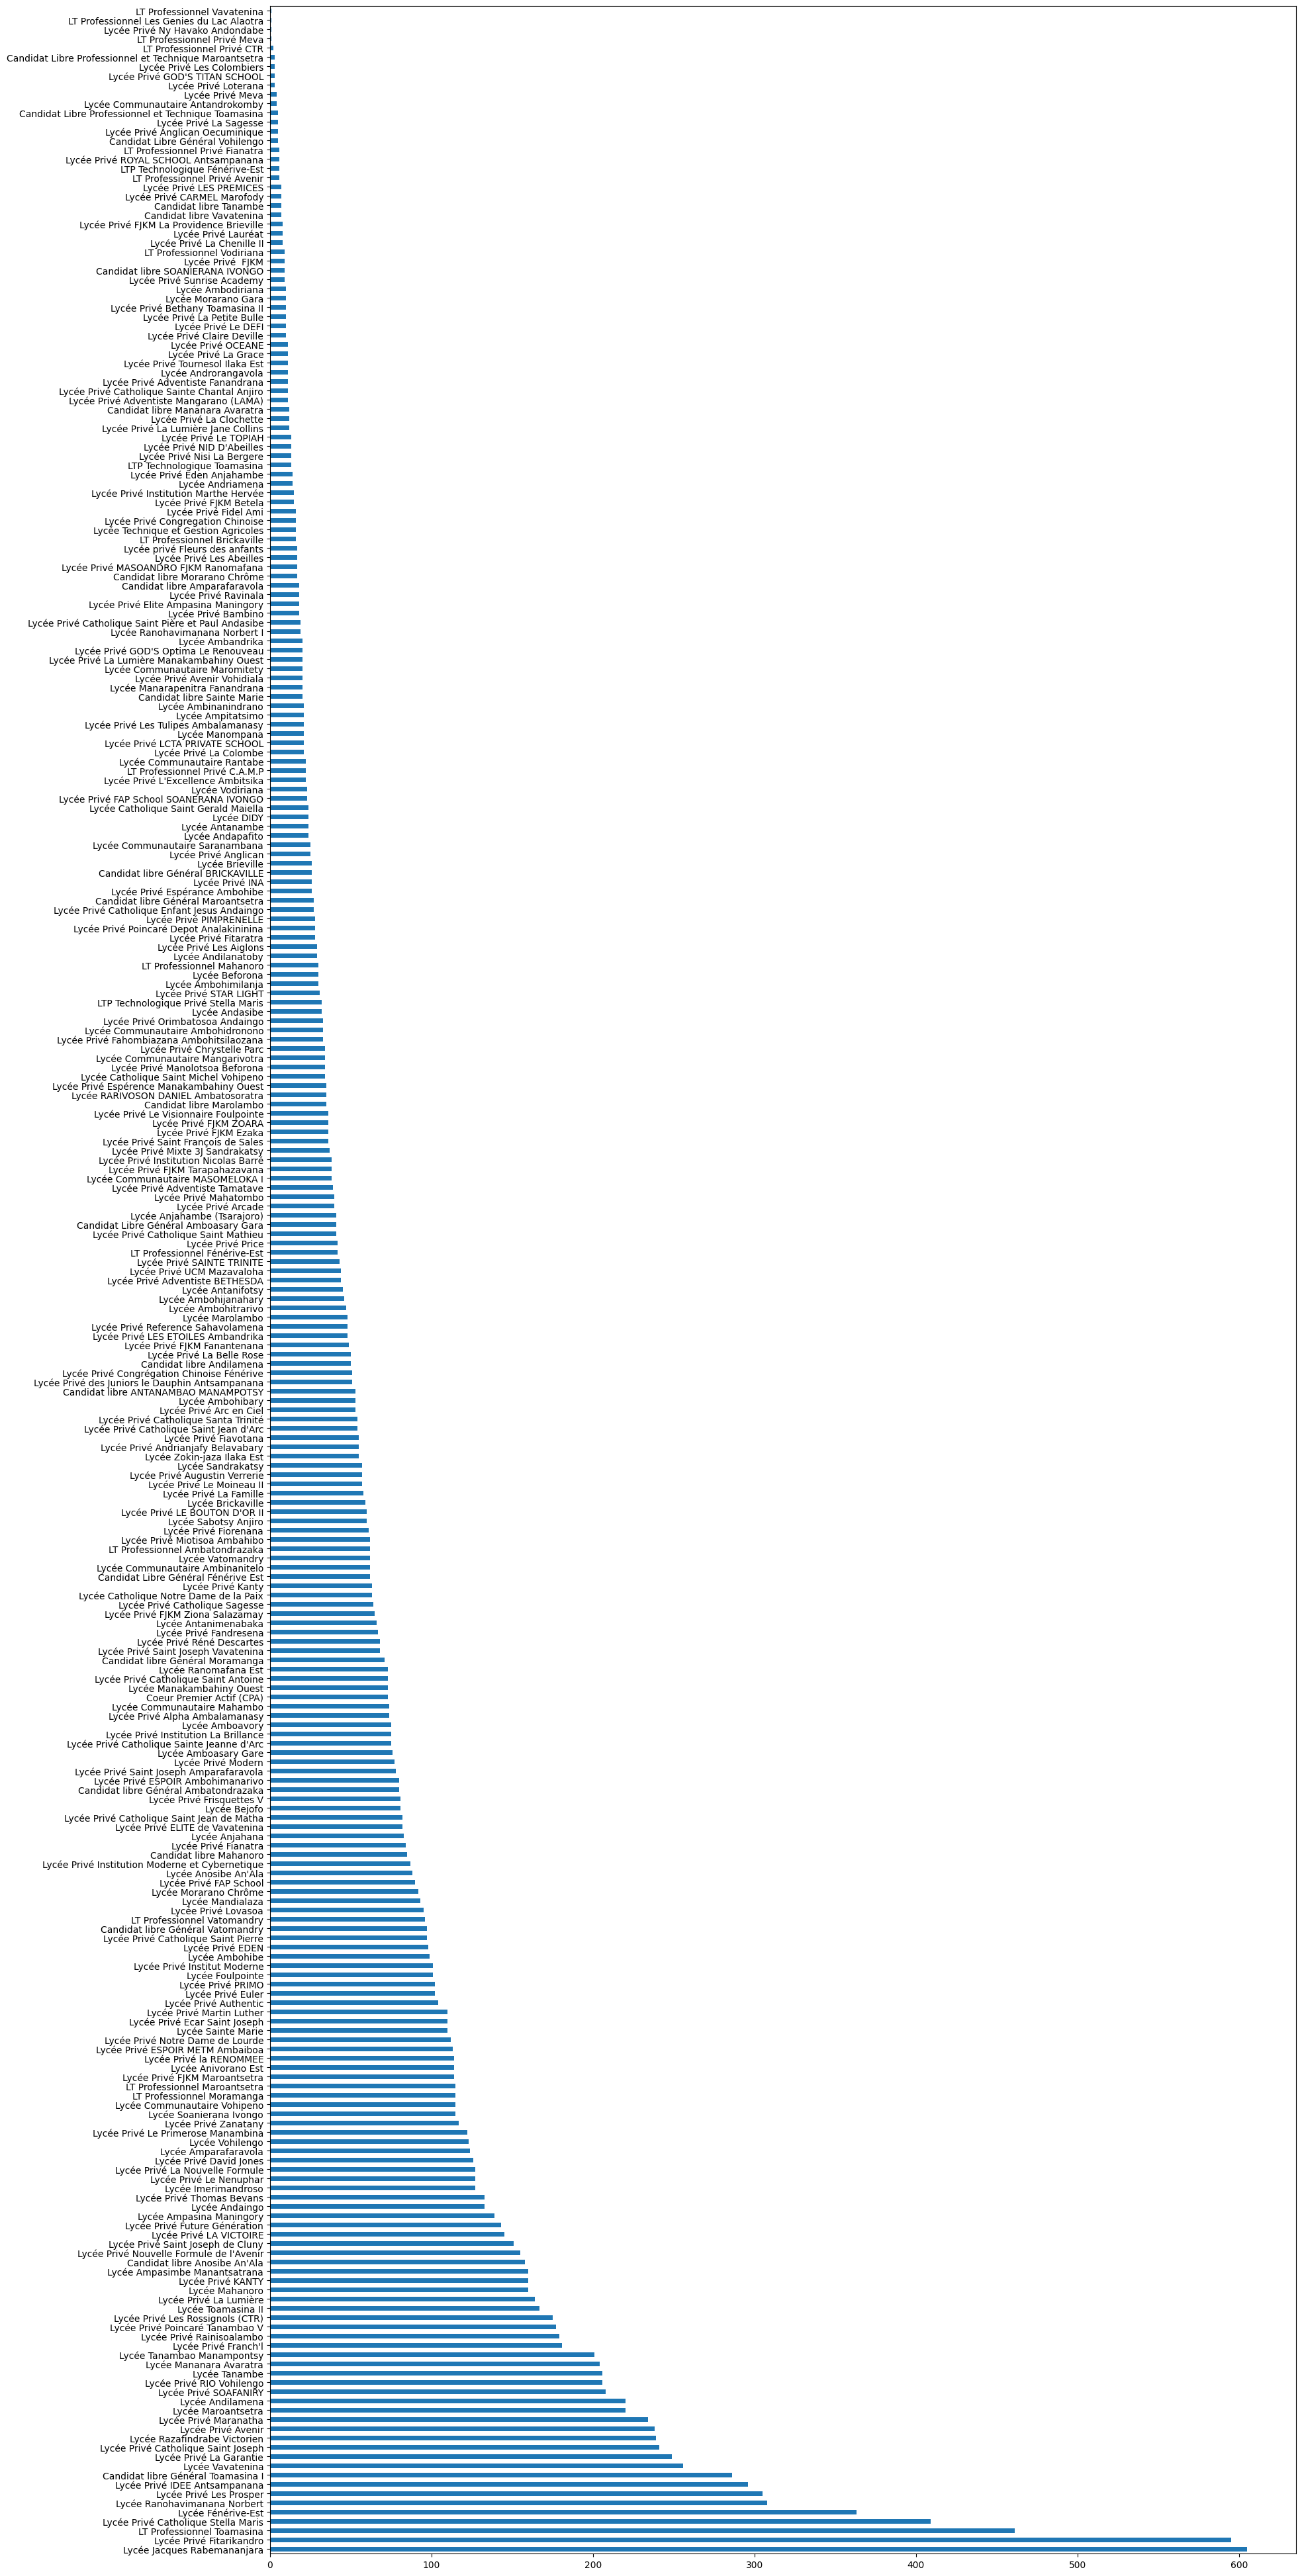

In [ ]:
plt.figure(figsize=(20,50))
df['Etablissement'].value_counts().plot(kind="barh")

On observe une forte concentration de données dans le lycée Jacques Rabemananjara, principalement situé dans le centre-ville, où la densité de population est plus élevée. La plupart des lycées qui se situent dans la moyenne semblent être dans des zones plus peuplées. Cependant, pour certains établissements, le nombre d'élèves ayant passé leur baccalauréat est nettement inférieur, ce qui semble cohérent, car la plupart des lycées représentés dans les données sont des lycées techniques. Étant donné le nombre d'élèves optant pour un baccalauréat série technique, cette distribution est donc attendue.

### Nom et prénom :

In [ ]:
df['Nom'].describe()

count             19879
unique            10219
top       NOMENJANAHARY
freq                183
Name: Nom, dtype: object

In [ ]:
df['Prénoms']

0             Rija Evarist
1          Tahina Francice
2            Eugene Whilly
3                   Zinolà
4            Jacques Marco
               ...        
19874    Marie Francelette
19875    Lovasoa Charlotte
19876      Jeudinot Franki
19877     José Christalino
19878        Jose Grazielo
Name: Prénoms, Length: 19879, dtype: object

Effectivement, les colonnes du nom et du prénom sont des identifiants uniques pour chaque élève. Analyser ces colonnes ne semble pas apporter d'informations significatives pour notre objectif, car elles agissent simplement comme des identifiants uniques sans avoir beaucoup de relation avec notre variable cible

In [ ]:
df['Etablissement'].value_counts().describe()

count    275.000000
mean      72.287273
std       85.510069
min        1.000000
25%       20.000000
50%       44.000000
75%       95.500000
max      605.000000
Name: Etablissement, dtype: float64

On constate que l'ecart type est supérieur à la moyenne .La distributions de la variable est asymétrique à droite , car la moyenne est supérieure à la médiane .Cela signifie qu'il a quelque valeurs très grandes et que la majorité des valeurs sont plus petit.

Maintenant, passons à l'exploration des relations entre la variable cible et les caractéristiques (features)

#### 2-3 Relation target et variables:

In [ ]:
df.head()

Numéro               Nom          Prénoms Série   Mention       Centre  \
0  142 0000  ANDRIANANTENAINA     Rija Evarist    A1  Passable  TOAMASINA I   
1  142 0001         NALAHATRA  Tahina Francice    A1  Passable  TOAMASINA I   
2  142 0002           RAJOSOA    Eugene Whilly    A1  Passable  TOAMASINA I   
3  142 0003       RAMANOELINA           Zinolà    A1  Passable  TOAMASINA I   
4  142 0004  RANDRIAMANANTENA    Jacques Marco    A1  Passable  TOAMASINA I   

      Etablissement   Catégorie  
0  Lycée Foulpointe  Littéraire  
1  Lycée Foulpointe  Littéraire  
2  Lycée Foulpointe  Littéraire  
3  Lycée Foulpointe  Littéraire  
4  Lycée Foulpointe  Littéraire

##### Relation entre Mention et Numero

Examiner la relation entre la mention et le numéro ne semble pas être une avenue très informative, étant donné que le numéro agit comme un identifiant unique et ne contribuera pas de manière significative à notre analyse.

##### Relation entre Mention et Nom et prénom

De même, examiner la relation entre la mention et les colonnes du nom et du prénom ne semble pas être très informatif, car le numéro agit comme un identifiant unique et ne contribuera pas de manière significative à notre analyse.

##### Relation entre Mention et Centre

In [ ]:
df['Mention'].unique()

array(['Passable', 'Assez bien', 'Bien', 'Très bien'], dtype=object)

Nous disposons de quatre mentions distinctes que nous allons analyser en relation avec le centre.

In [ ]:
#affichons tous les colonnes
pd.set_option('display.max_columns',111)

In [ ]:
pd.crosstab(df['Mention'],df['Centre'])

Centre      AMBATONDRAZAKA  AMBOASARY GARA  AMPARAFARAVOLA  ANDILAMENA  \
Mention                                                                  
Assez bien             273              74             181          53   
Bien                    30               4              16           4   
Passable              1414             273             690         430   
Très bien                0               0               0           0   

Centre      ANOSIBE AN'ALA  ANTANAMBAO MANAMPOTSY  FENERIVE-EST  \
Mention                                                           
Assez bien              90                     46           222   
Bien                     7                      2            21   
Passable               249                    206          1269   
Très bien                0                      0             0   

Centre      IMERIMANDROSO  MAHANORO  MANANARA AVARATRA  MAROANTSETRA  \
Mention                                                                
Assez bien             22        45                131           258   
Bien                    0         3                  3             8   
Passable              122       417                842          1345   
Très bien               0         0                  0             0   

Centre      MAROLAMBO  MORAMANGA  MORARANO CHROME  SAINTE MARIE  \
Mention                                                           
Assez bien         12        277               84            62   
Bien                0         47                8             4   
Passable          115       1347              326           152   
Très bien           0          5                0             0   

Centre      SOANIERANA IVONGO  TANAMBE  TOAMASINA I  VATOMANDRY  VAVATENINA  \
Mention                                                                       
Assez bien                 50       79          909          83         156   
Bien                        3        5          114          10          12   
Passable                  412      616         3785         448         808   
Très bien                   0        0            9           1           0   

Centre      VOHIBINANY (BRICKAVILLE)  VOHILENGO  
Mention                                          
Assez bien                       165        144  
Bien                               9          1  
Passable                         490        381  
Très bien                          0          0

<Axes: xlabel='Centre', ylabel='Mention'>

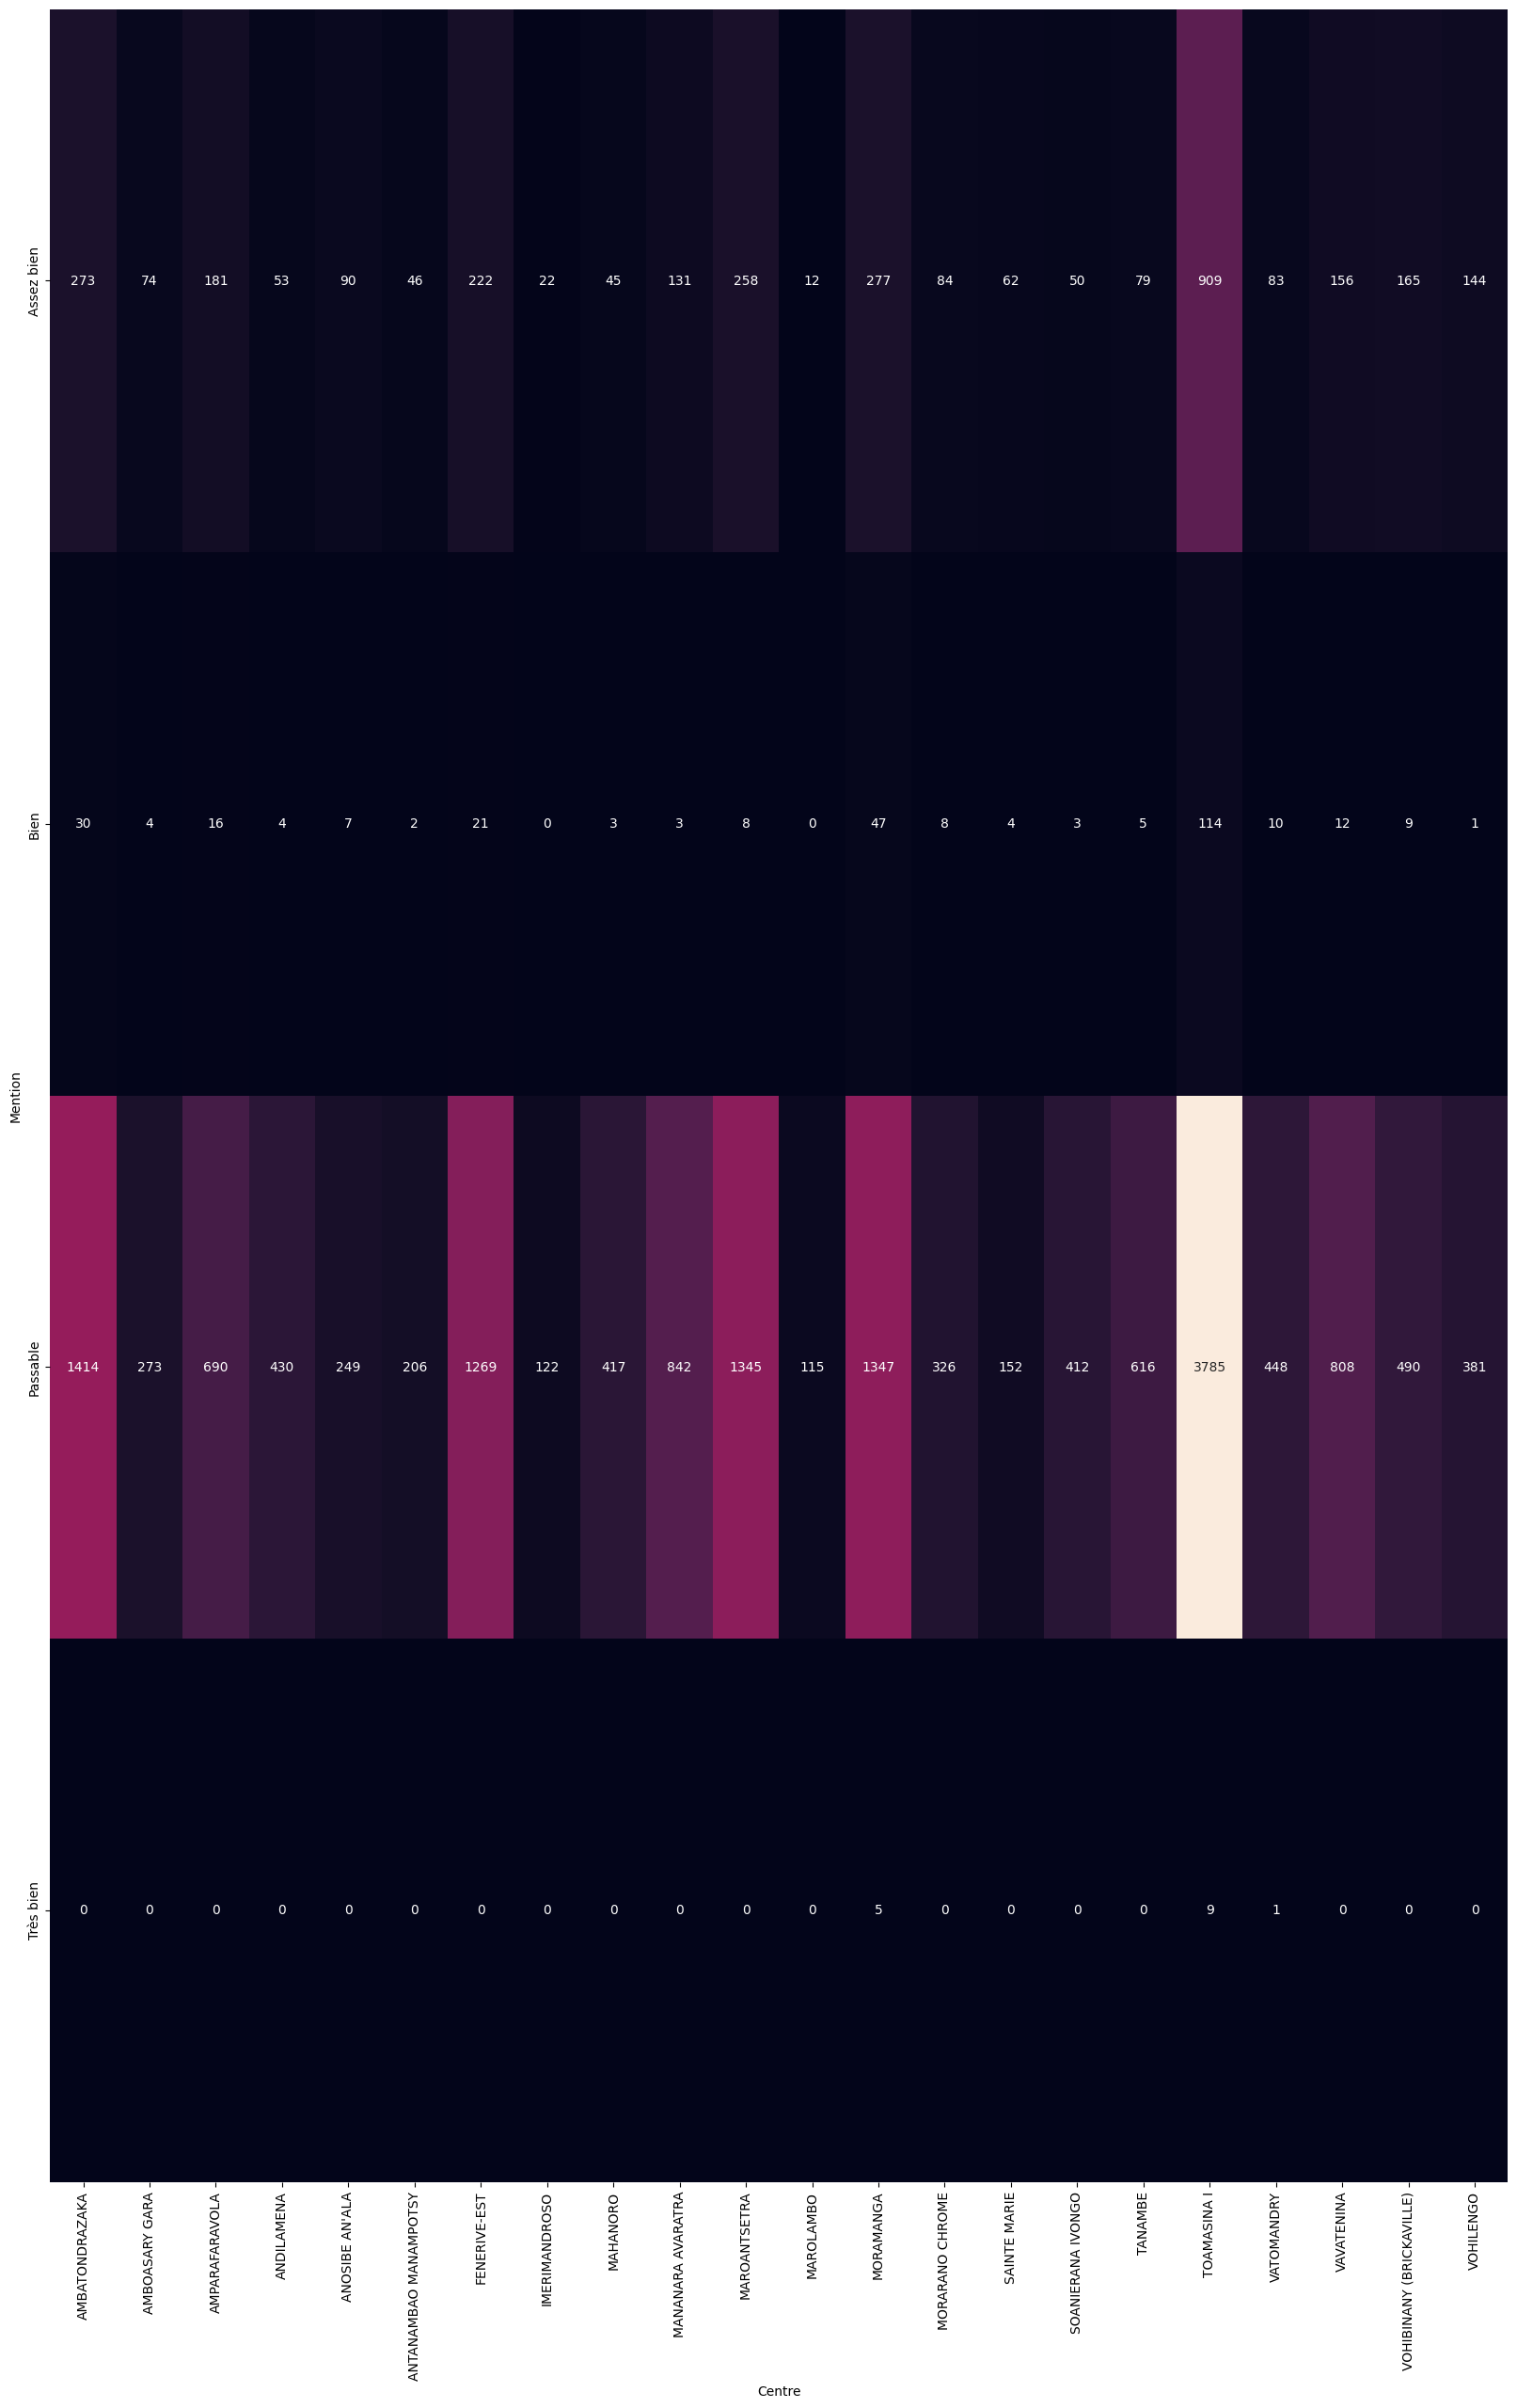

In [ ]:
plt.figure(figsize=(20,30))
sns.heatmap(pd.crosstab(df['Mention'],df['Centre']), annot=True,fmt='d',cbar=False)

On constate que 9 sur 15 des mentions 'Très Bien' sont attribuées à Toamasina I, tandis qu'il n'y en a qu'une seule à Vatomandry. Cela suggère que de nombreux étudiants brillants se trouvent à Toamasina I. Toutefois, il est important de noter que la population étudiante à Toamasina I est également significative. Par conséquent, il est difficile de tirer des conclusions définitives, mais on peut affirmer qu'il existe une concentration d'élèves d'élite à Toamasina I.

En ce qui concerne la mention 'Bien', on observe une répartition assez homogène, bien que toujours concentrée à Toamasina I. Il est également notable que Moramanga maintient sa position en tant que deuxième dans le classement, suivi par Ambatondrazaka en troisième position. Cette tendance semble se refléter dans toutes les mentions en général."







Cependant, il est à noter que dans les régions de 'Vohilengo' et 'Antanambaomanampotsy', les mentions 'Bien' et 'Assez Bien' semblent être relativement rares. La mention 'Passable' demeure toujours prédominante dans chaque ville, indépendamment de ces variations.


##### Relation entre Mention et établissement

In [ ]:
pd.crosstab(df['Mention'],df['Etablissement'])

Etablissement  Candidat Libre Général Amboasary Gara  \
Mention                                                
Assez bien                                         4   
Bien                                               1   
Passable                                          36   
Très bien                                          0   

Etablissement  Candidat Libre Général Fénérive Est  \
Mention                                              
Assez bien                                       2   
Bien                                             0   
Passable                                        60   
Très bien                                        0   

Etablissement  Candidat Libre Général Vohilengo  \
Mention                                           
Assez bien                                    0   
Bien                                          0   
Passable                                      5   
Très bien                                     0   

Etablissement  Candidat Libre Professionnel et Technique Maroantsetra  \
Mention                                                                 
Assez bien                                                     0        
Bien                                                           0        
Passable                                                       3        
Très bien                                                      0        

Etablissement  Candidat Libre Professionnel et Technique Toamasina  \
Mention                                                              
Assez bien                                                     0     
Bien                                                           0     
Passable                                                       5     
Très bien                                                      0     

Etablissement  Candidat libre ANTANAMBAO MANAMPOTSY  \
Mention                                               
Assez bien                                        1   
Bien                                              0   
Passable                                         52   
Très bien                                         0   

Etablissement  Candidat libre Amparafaravola  Candidat libre Andilamena  \
Mention                                                                   
Assez bien                                 1                          4   
Bien                                       0                          1   
Passable                                  17                         45   
Très bien                                  0                          0   

Etablissement  Candidat libre Anosibe An'Ala  \
Mention                                        
Assez bien                                38   
Bien                                       1   
Passable                                 119   
Très bien                                  0   

Etablissement  Candidat libre Général Ambatondrazaka  \
Mention                                                
Assez bien                                         6   
Bien                                               1   
Passable                                          73   
Très bien                                          0   

Etablissement  Candidat libre Général BRICKAVILLE  \
Mention                                             
Assez bien                                      1   
Bien                                            0   
Passable                                       25   
Très bien                                       0   

Etablissement  Candidat libre Général Maroantsetra  \
Mention                                              
Assez bien                                       1   
Bien                                             0   
Passable                                        26   
Très bien                                        0   

Etablissement  Candidat libre Général Moramanga  \
Mention                                           
Assez bien       

D'après le tableau, on observe la rareté des mentions 'Très Bien', et celles-ci sont fortement dispersées dans chaque lycée. Il est intéressant de noter que le 'Lycée Professionnel Moramanga' détient le plus grand nombre de mentions 'Très Bien', soulignant ainsi le succès notable d'un lycée technique.

##### Relation entre Mention et Categorie

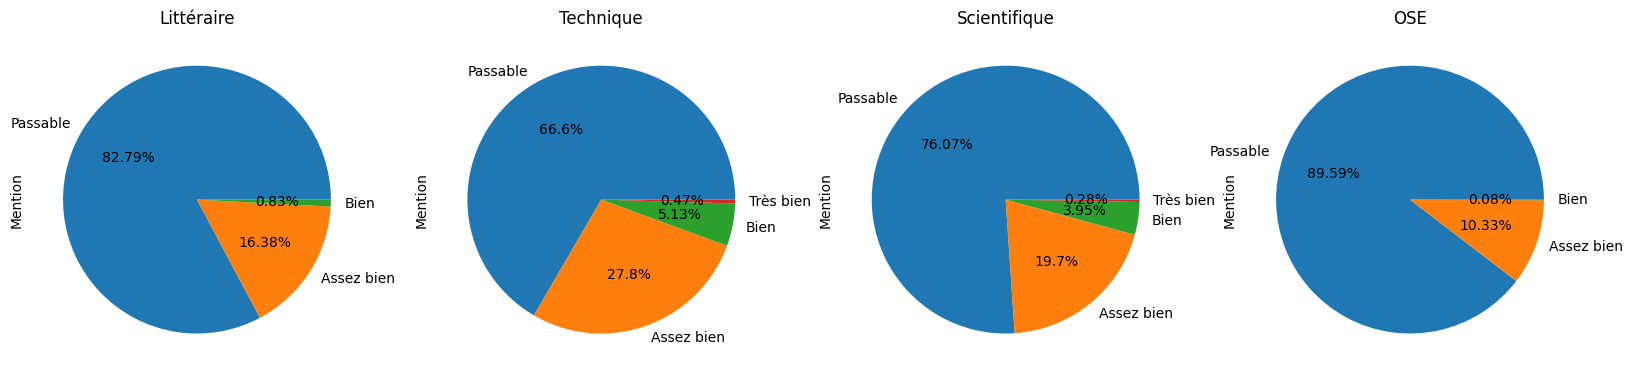

In [ ]:
def pct(pct):
    return str(round(pct, 2)) + '%'

plt.figure(figsize=(20,20))
i = 1
for cat in df["Catégorie"].unique():
    plt.subplot(4, 4, i)
    dfc = df[df["Catégorie"] == cat]
    dfc['Mention'].value_counts().plot.pie(autopct=pct);
    plt.title(cat)
    i += 1

plt.show()

Il est à noter que la mention 'Très Bien' est négligeable pour les étudiants littéraires. La majorité des étudiants ont obtenu la mention 'Passable', atteignant ainsi 82,79%. On pourrait alors conclure que la plupart des étudiants en filière littéraire ont des performances académiques moins élevées. Cependant, il est important de rappeler que, comme mentionné précédemment, de nombreux élèves scientifiques choisissent également de passer le baccalauréat littéraire en parallèle. Par conséquent, les résultats semblent difficiles à interpréter de manière définitive.

En ce qui concerne les séries techniques, la mention 'Très Bien' semble représenter seulement 1% des cas. Cela signifie que la grande majorité, soit 66%, se situe dans la catégorie 'Passable'. On peut donc conclure que les étudiants de la série technique ont des performances globalement moyennes.

De manière similaire à la filière littéraire, les résultats pour les OSE semblent assez proches, à la différence près qu'il y a une proportion plus élevée de mentions 'Passable' et que la mention 'Très Bien' apparaît comme extrêmement négligeable. Les performances des étudiants en OSE semblent donc se situer dans la moyenne, avec une faible représentation des mentions les plus élevées.







### Relation entre caractéristique(features):

In [ ]:
df.head()

Numéro               Nom          Prénoms Série   Mention       Centre  \
0  142 0000  ANDRIANANTENAINA     Rija Evarist    A1  Passable  TOAMASINA I   
1  142 0001         NALAHATRA  Tahina Francice    A1  Passable  TOAMASINA I   
2  142 0002           RAJOSOA    Eugene Whilly    A1  Passable  TOAMASINA I   
3  142 0003       RAMANOELINA           Zinolà    A1  Passable  TOAMASINA I   
4  142 0004  RANDRIAMANANTENA    Jacques Marco    A1  Passable  TOAMASINA I   

      Etablissement   Catégorie  
0  Lycée Foulpointe  Littéraire  
1  Lycée Foulpointe  Littéraire  
2  Lycée Foulpointe  Littéraire  
3  Lycée Foulpointe  Littéraire  
4  Lycée Foulpointe  Littéraire

#### Relation entre Centre et Etablissement:

In [ ]:
pd.set_option('display.max_row',275)


In [ ]:
pd.crosstab(df['Centre'],df['Etablissement'])

Etablissement             Candidat Libre Général Amboasary Gara  \
Centre                                                            
AMBATONDRAZAKA                                                0   
AMBOASARY GARA                                               41   
AMPARAFARAVOLA                                                0   
ANDILAMENA                                                    0   
ANOSIBE AN'ALA                                                0   
ANTANAMBAO MANAMPOTSY                                         0   
FENERIVE-EST                                                  0   
IMERIMANDROSO                                                 0   
MAHANORO                                                      0   
MANANARA AVARATRA                                             0   
MAROANTSETRA                                                  0   
MAROLAMBO                                                     0   
MORAMANGA                                                     0   
MORARANO CHROME                                               0   
SAINTE MARIE                                                  0   
SOANIERANA IVONGO                                             0   
TANAMBE                                                       0   
TOAMASINA I                                                   0   
VATOMANDRY                                                    0   
VAVATENINA                                                    0   
VOHIBINANY (BRICKAVILLE)                                      0   
VOHILENGO                                                     0   

Etablissement             Candidat Libre Général Fénérive Est  \
Centre                                                          
AMBATONDRAZAKA                                              0   
AMBOASARY GARA                                              0   
AMPARAFARAVOLA                                              0   
ANDILAMENA                                                  0   
ANOSIBE AN'ALA                                              0   
ANTANAMBAO MANAMPOTSY                                       0   
FENERIVE-EST                                               62   
IMERIMANDROSO                                               0   
MAHANORO                                                    0   
MANANARA AVARATRA                                           0   
MAROANTSETRA                                                0   
MAROLAMBO                                                   0   
MORAMANGA                                                   0   
MORARANO CHROME                                             0   
SAINTE MARIE                                                0   
SOANIERANA IVONGO                                           0   
TANAMBE                                                     0   
TOAMASINA I                                                 0   
VATOMANDRY                                                  0   
VAVATENINA                                                  0   
VOHIBINANY (BRICKAVILLE)                                    0   
VOHILENGO                                                   0   

Etablissement             Candidat Libre Général Vohilengo  \
Centre                                                       
AMBATONDRAZAKA                                           0   
AMBOASARY GARA                                           0   
AMPARAFARAVOLA                                           0   
ANDILAMENA                                               0   
ANOSIBE AN'ALA                                           0   
ANTANAMBAO MANAMPOTSY                                    0   
FENERIVE-EST                                             0   
IMERIMANDROSO                                            0   
MAHANORO                                                 0   
MANANARA AVARATRA                                        0   
MAROANTSETRA                                             0   
MAROLAMBO               

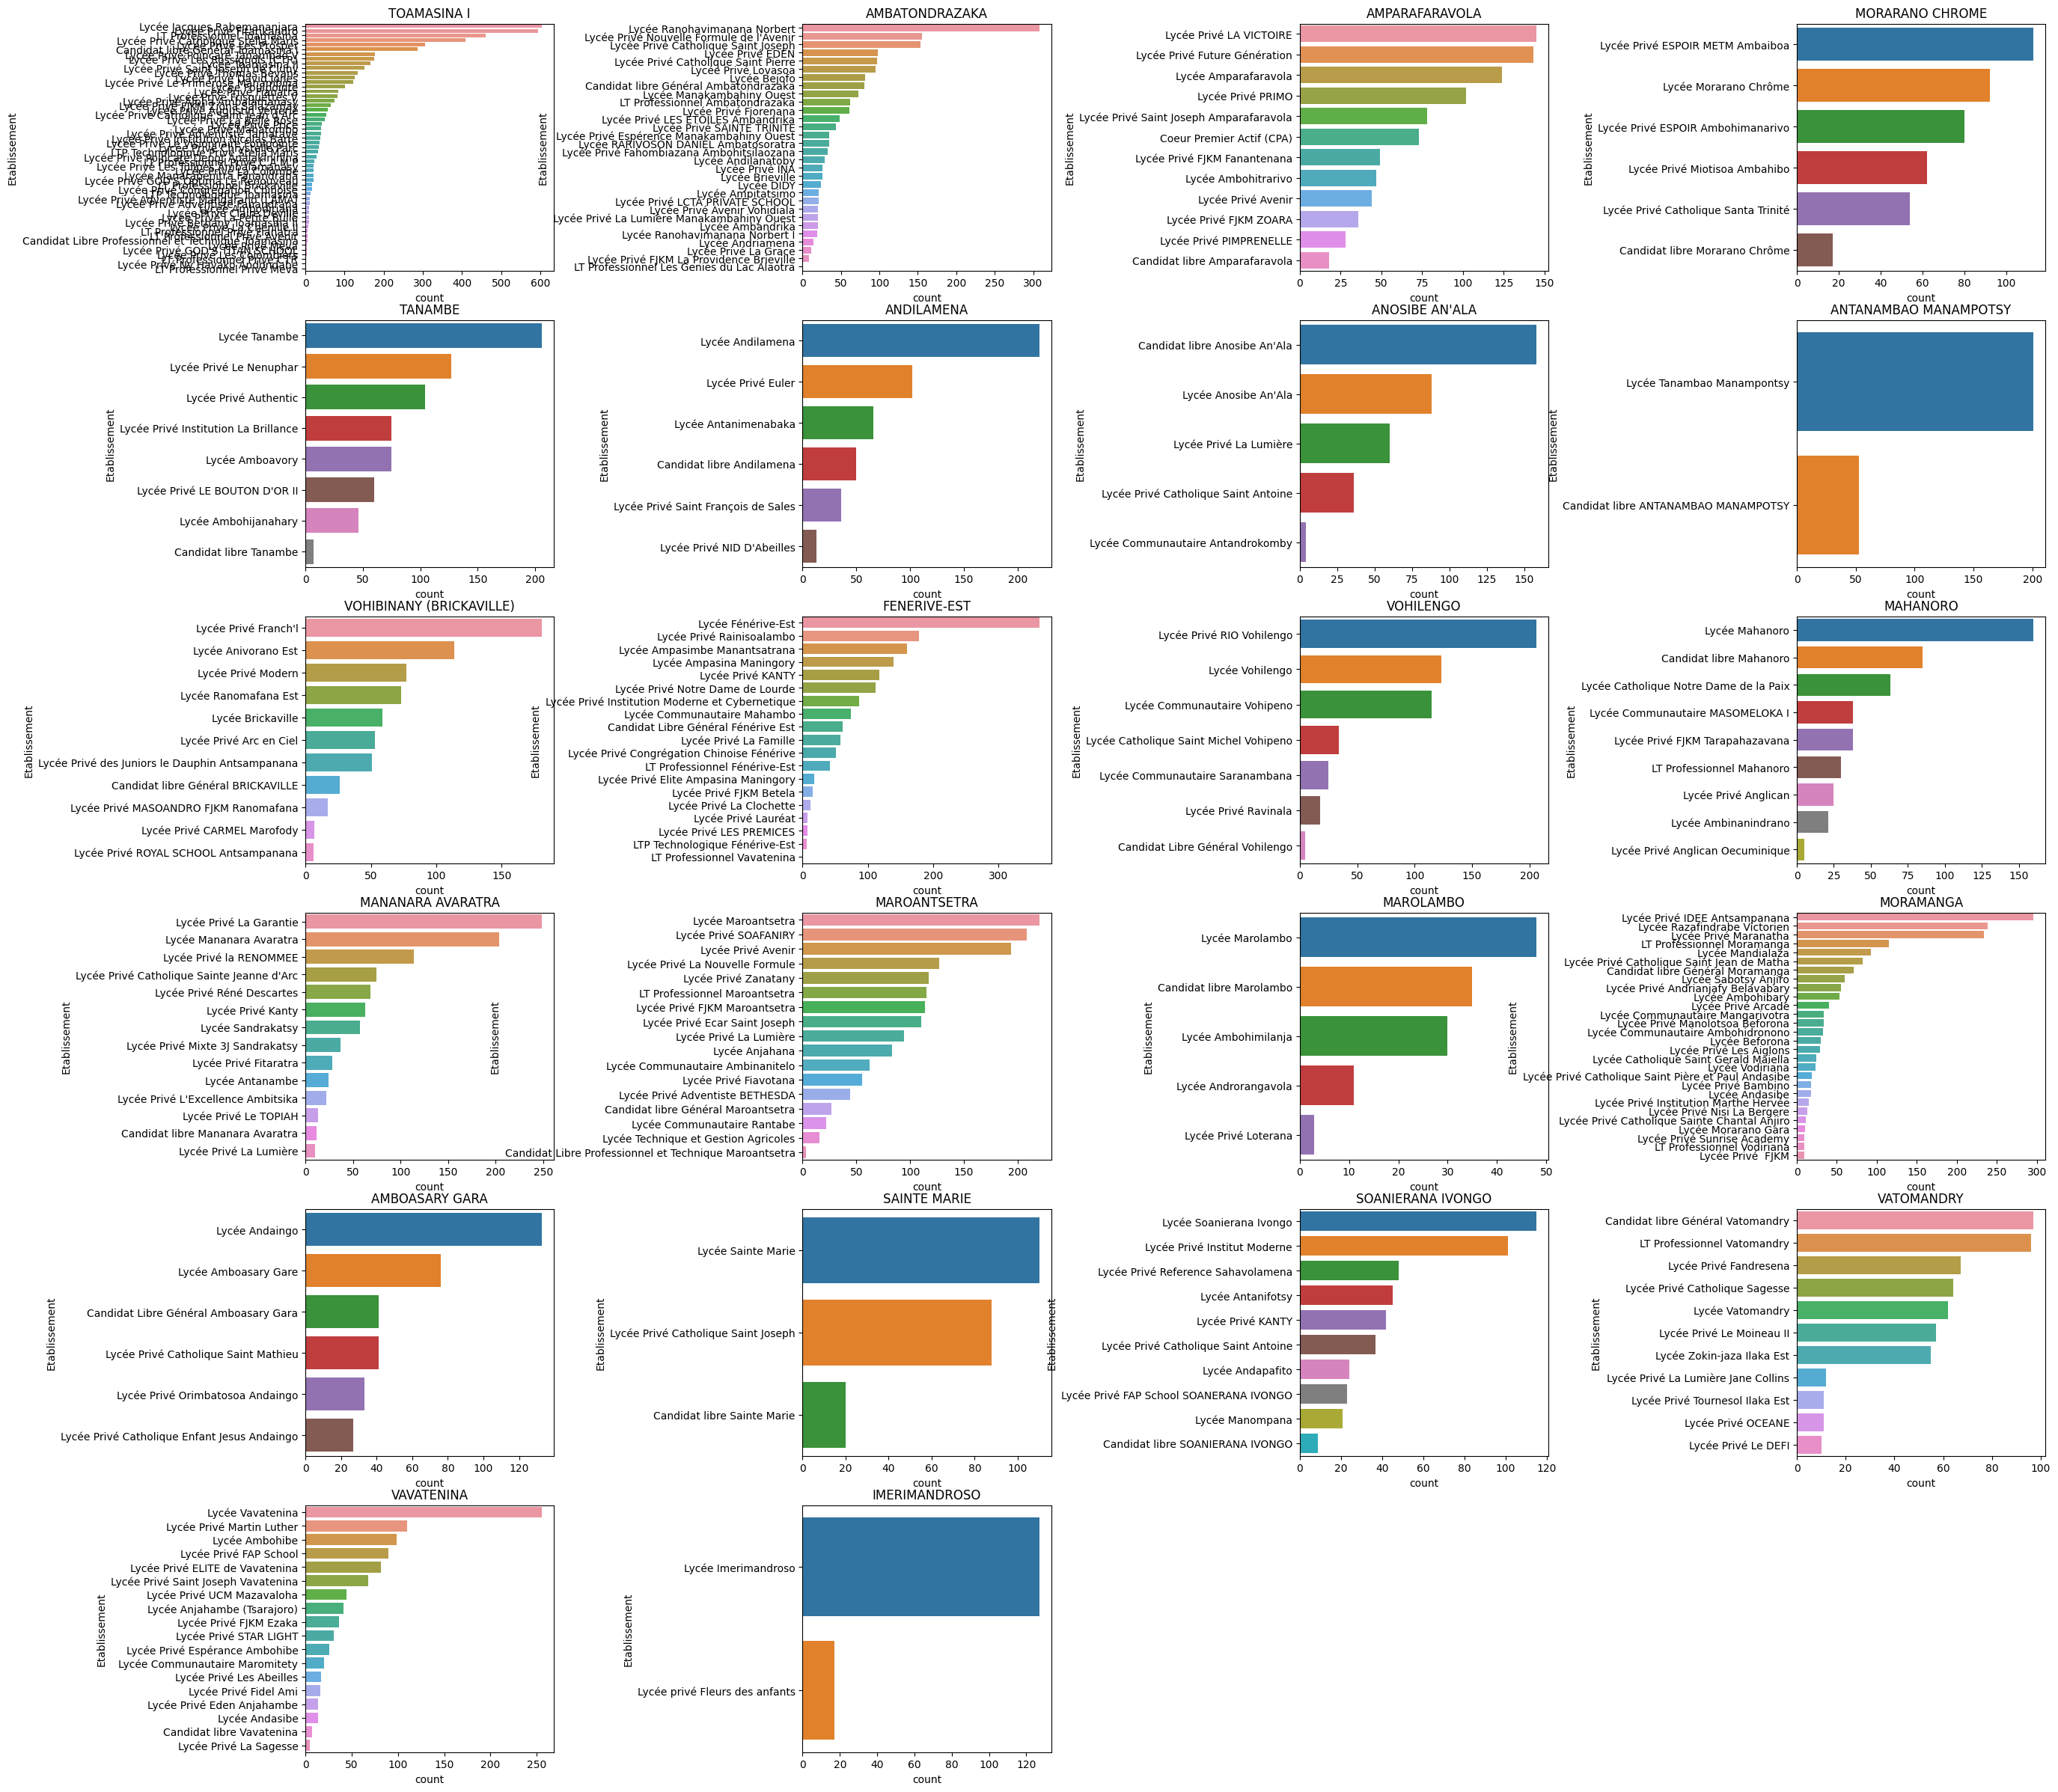

In [ ]:
df1=df.groupby("Centre").value_counts(["Etablissement"]).reset_index()
i = 1
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=1)
for c in df["Centre"].unique():
    plt.subplot(6, 4, i)
    sns.barplot(data=df1[df1["Centre"]==c], y="Etablissement",x=0)
    plt.xlabel("count")
    plt.title(c)
    i+=1

À la lumière du tableau et du graphique, on observe que la majorité des étudiants sont répartis dans le centre géographiquement le plus proche d'eux. Il est à noter qu'il existe de nombreux établissements à "Toamasina I", "Ambatondrazaka", "Vavatenina", "Maroantsetra" et "Moramanga". Cette distribution semble être une caractéristique normale, étant donné que ces centres correspondent aux zones urbaines. En revanche, il y a moins de lycées à "Imerimandroso", "Sainte-Marie" et "Antanambao Manampotsy"

#### Relation entre Centre et catégorie

In [ ]:
pd.crosstab(df['Centre'],df['Catégorie']).describe()

Catégorie   Littéraire         OSE  Scientifique   Technique
count        22.000000   22.000000     22.000000   22.000000
mean        635.318182   59.409091    160.136364   48.727273
std         617.987162   62.180734    236.615077  123.484019
min          57.000000    0.000000      1.000000    0.000000
25%         267.500000   21.000000     35.750000    0.000000
50%         411.500000   47.500000     72.500000    0.000000
75%         785.000000   62.750000    190.500000   44.250000
max        2906.000000  227.000000   1118.000000  566.000000

Le tableau présente des statistiques descriptives pour quatre catégories de données : littéraire, OSE, scientifique et technique.

À la lumière de ces statistiques, on peut conclure que les séries littéraires affichent la moyenne la plus élevée. Cependant, il est important de noter que cette tendance est compréhensible en raison du nombre d'élèves qui passent le baccalauréat en parallèle. En revanche, la catégorie des OSE présente la moyenne la plus basse, ce qui semble cohérent compte tenu du nombre d'étudiants dans cette filière. Enfin, la catégorie technique se distingue par l'écart-type le plus élevé, suggérant une plus grande variabilité dans les résultats.

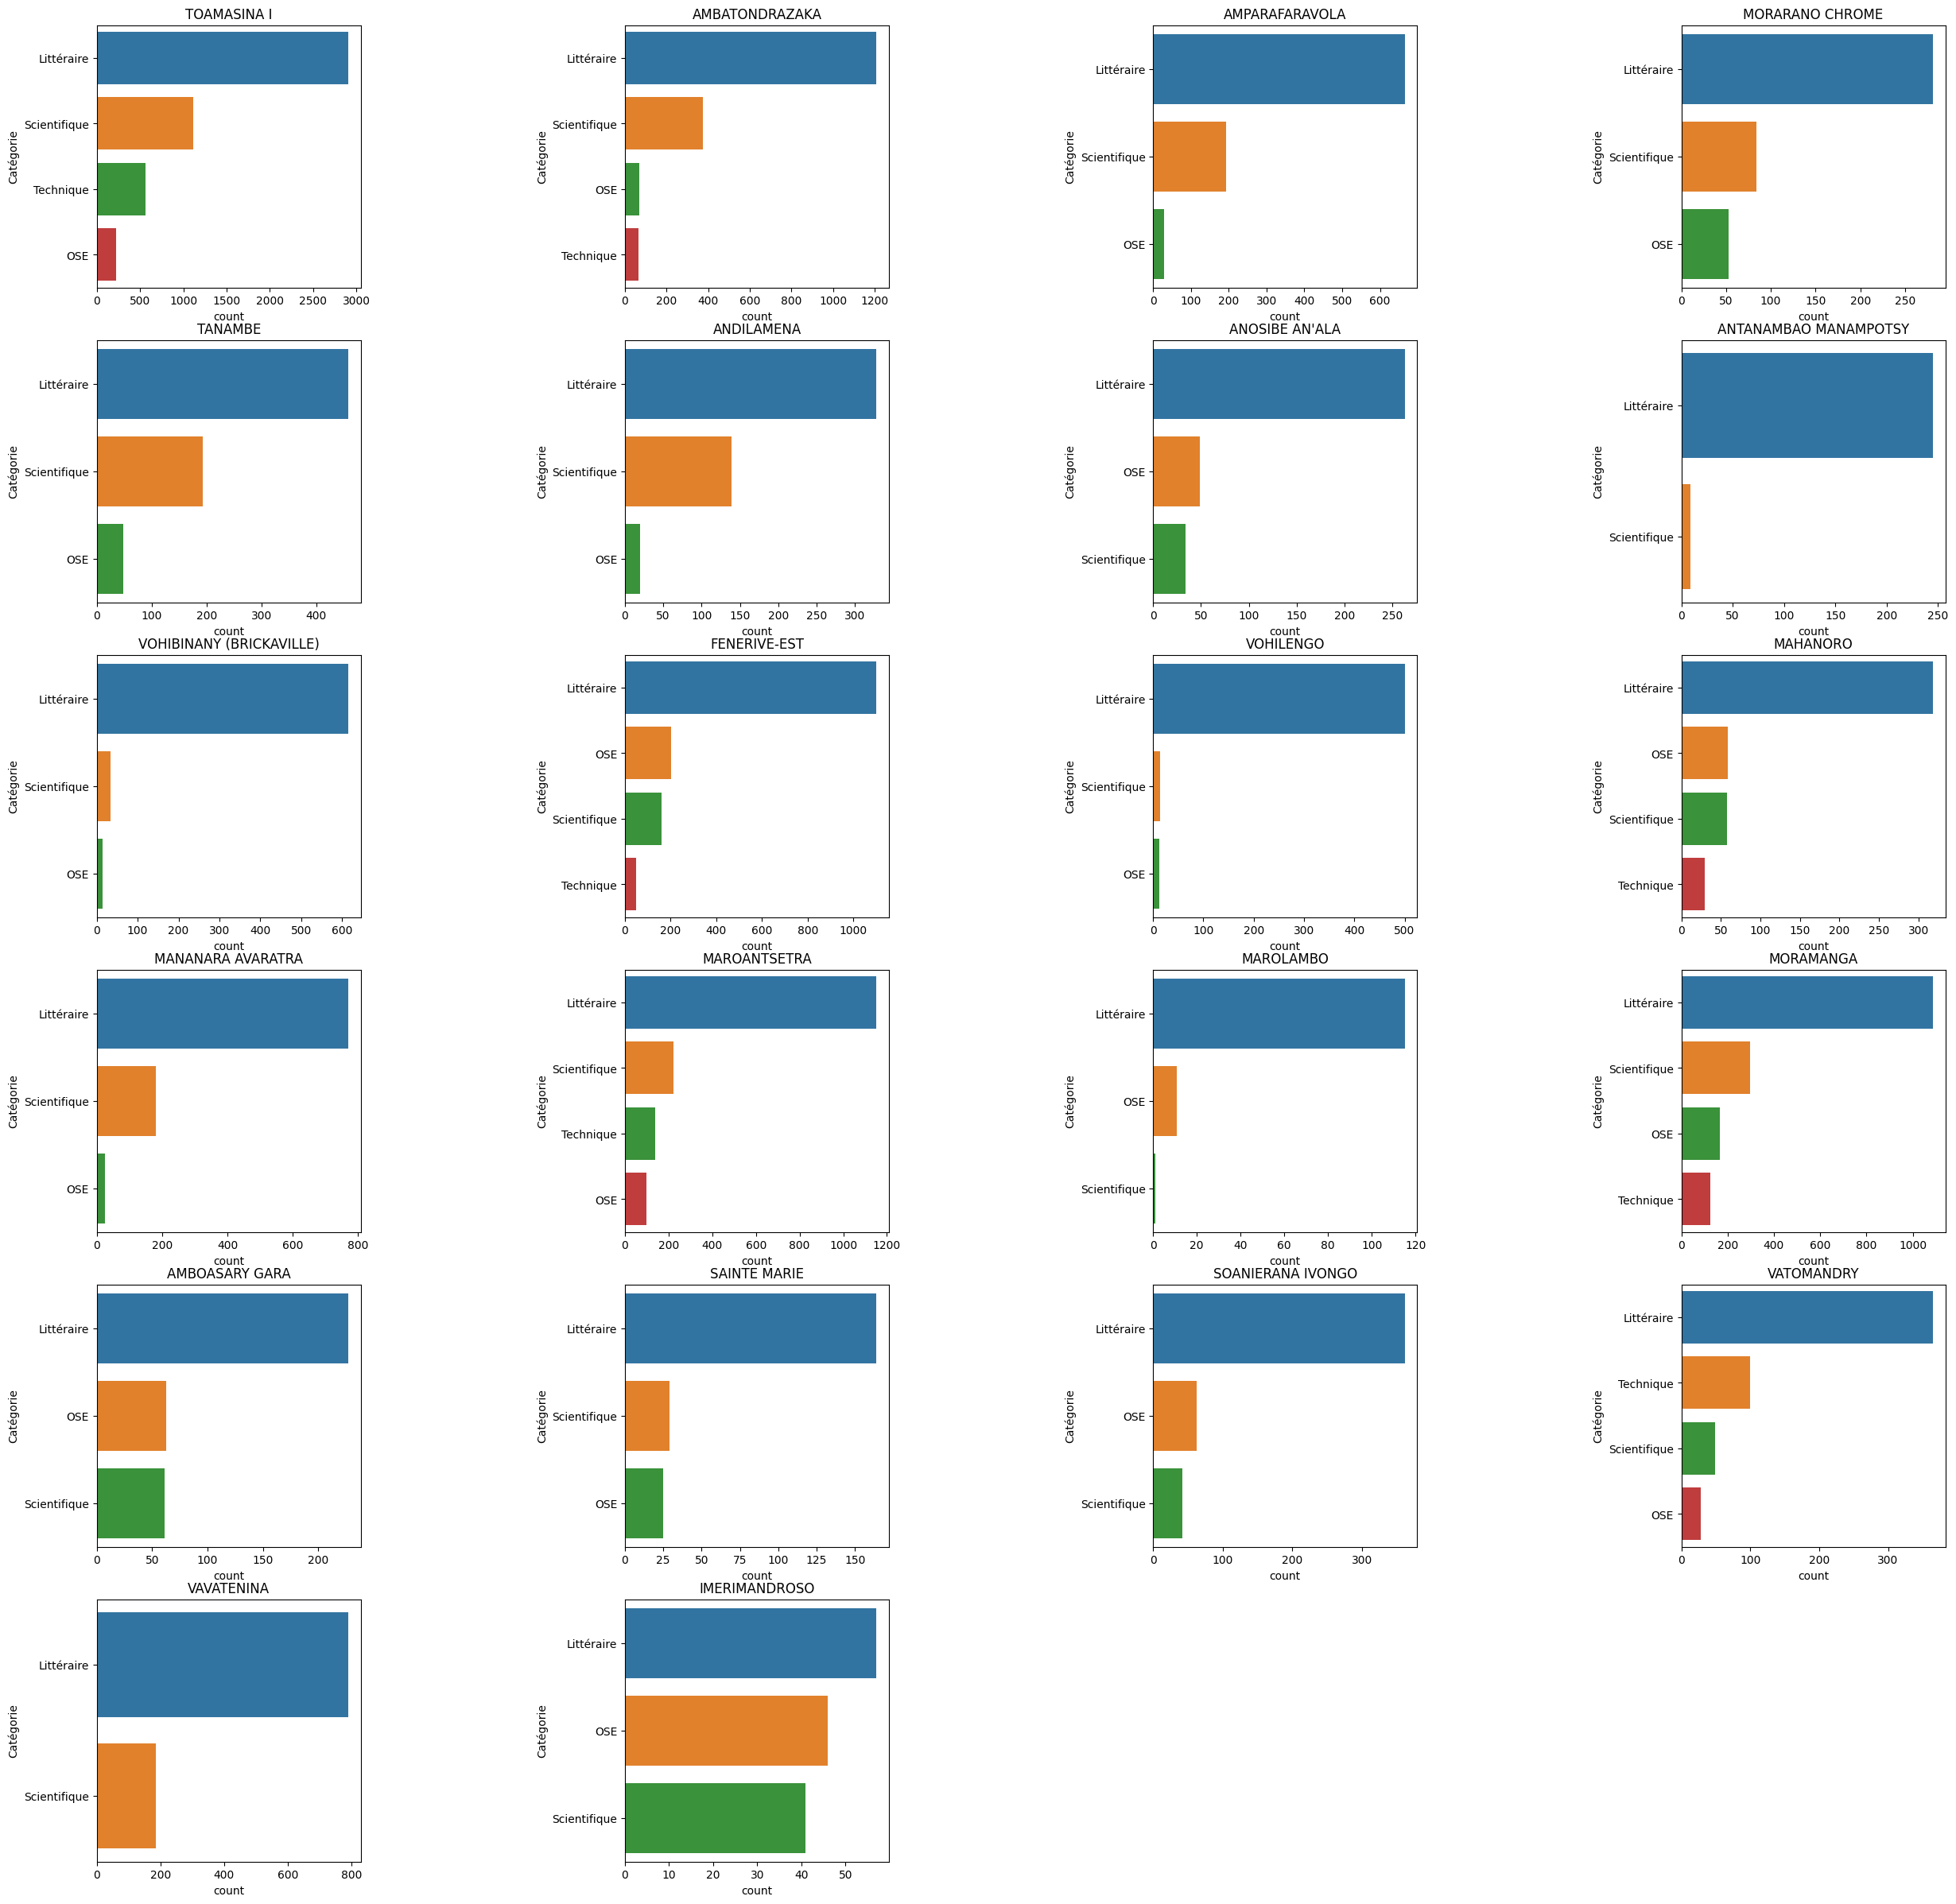

In [ ]:
df1=df.groupby("Centre").value_counts(["Catégorie"]).reset_index()
i = 1
plt.figure(figsize=(30,30))
plt.subplots_adjust(wspace=1)
for c in df["Centre"].unique():
    plt.subplot(6, 4, i)
    sns.barplot(data=df1[df1["Centre"]==c], y="Catégorie",x=0)
    plt.xlabel("count")
    plt.title(c)
    i+=1

On observe l'absence d'étudiants en OSE à 'Vavatenina' et 'Antanambao Manampotsy'. De plus, à 'Marolambo', le nombre d'étudiants en filière scientifique est très limité. Les régions de 'Vohilengo', 'Fénérive Est' et 'Vohibinany' présentent également un faible effectif d'étudiants en filière scientifique et OSE. En revanche, d'autres régions semblent se situer dans la moyenne en termes de répartition des étudiants

### II. Conclusion:

 En synthèse, l'analyse des données présentées dans le tableau et le graphique met en lumière plusieurs tendances significatives. Tout d'abord, on observe que la répartition des mentions varie considérablement d'une région à une autre. Toamasina I se distingue avec un nombre important de mentions 'Très Bien', soulignant la présence d'une élite académique dans cette localité. Cependant, la prévalence de cette mention dans d'autres régions semble être relativement limitée.

En ce qui concerne les filières, les étudiants en série littéraire semblent avoir une moyenne plus élevée, mais il est crucial de noter que cela peut être influencé par la participation d'élèves passant le baccalauréat en parallèle. À l'opposé, la filière OSE présente la moyenne la plus basse, ce qui peut être expliqué par le nombre réduit d'étudiants dans cette catégorie. La filière technique se caractérise par l'écart-type le plus élevé, indiquant une plus grande variabilité des résultats.

Par ailleurs, l'analyse géographique révèle des disparités notables dans la répartition des étudiants selon les centres d'examen. Certaines localités, telles que 'Vavatenina' et 'Antanambao Manampotsy', présentent une absence d'étudiants en OSE. De plus, à 'Marolambo', le nombre d'étudiants en filière scientifique est limité. Les régions de 'Vohilengo', 'Fénérive Est' et 'Vohibinany' montrent également une faible présence d'étudiants en filière scientifique et OSE.

-----------------------------------------------------

Référence:

Cette rédaction a été assistée par ChatGPT , un modèle de langage développé par OpenAI, basé sur l'architecture GPT-3.5. Pour plus d'informations sur ChatGPT, veuillez visiter le site d'OpenAI.




# EXPLORATORY DATA ANALYSIS ORANGE ACTU

liens :https://actu.orange.mg/depeches/#page-1

I. Introduction :

Ce compte rendu se focalise sur l'Exploration des Données (EDA) du site d'actualités concernant Madagascar, accessible via Orange. Ce portail recense toutes les nouvelles relatives à Madagascar, fournissant des titres accompagnés de leur date de publication. Notre objectif principal réside dans l'exploration approfondie de ces données afin d'en extraire des informations pertinentes. Ce processus inclut également les étapes nécessaires de nettoyage des données pour garantir la qualité et la fiabilité des résultats obtenus.

Pour entamer notre démarche, nous importerons les bibliothèques, installerons les outils nécessaires, puis téléchargerons le fichier indispensable à notre analyse exploratoire des données.Dans la suite , Par la suite, nous utiliserons Spacy pour analyser le texte, étant donné que nos données sont textuelles.

In [ ]:
!pip install -U spaCy
!python -m spacy download fr
!python -m spacy download fr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: spaCy
    Found existing installation: spacy 3.6.1
    Uninstalling spacy-3.6.1:
      Successfully uninstalled spacy-3.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.6.0 requires spacy<3.7.0,>=3.6.0, but you have spacy 3.7.2 which is incompatible.
2023-11-27 15:19:16.263387: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-27 15:19:16.263481: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: A

In [ ]:
#importons spacy n-gram pour compter les n-gram
!pip install spacy-ngram

In [ ]:
#importation du fichier depuis drive
!gdown https://drive.google.com/u/0/uc?id=1c_JYkBC2w8ikdo94DMD_bx3KAoFubHLr

Downloading...
From: https://drive.google.com/u/0/uc?id=1c_JYkBC2w8ikdo94DMD_bx3KAoFubHLr
To: /content/orange_mg.csv
100% 43.4M/43.4M [00:00<00:00, 43.7MB/s]


In [ ]:
import spacy
nlp = spacy.load("fr_core_news_sm")
import fr_core_news_sm
nlp = fr_core_news_sm.load()

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from tqdm import trange
from collections import Counter
from spacy_ngram import NgramComponent
from spacy.lang.fr.stop_words import STOP_WORDS
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
data = pd.read_csv('orange_mg.csv')

### Analyse du tableau

Passons à l'analyse du tableau. Pour ce faire, effectuons une copie du dataframe.

In [ ]:
df = data.copy()

In [ ]:
df.head()

titre                                           contenue  \
0         RALLYE  Un pilote malgache à suivre de près en France....   
1         BETAFO  Betafo est devenu un passage obligatoire des t...   
2      AUTOROUTE  La société civile demande aussi aux responsabl...   
3        VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4  PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   

   dataPublication temps_publication  
0              NaN               NaN  
1              NaN               NaN  
2              NaN               NaN  
3              NaN               NaN  
4              NaN               NaN

Examinons la taille du tableau.

In [ ]:
df.shape


(93705, 4)

Nous disposons d'un dataframe comprenant 93 705 lignes et 4 colonnes. Cela étant dit, nous allons approfondir notre étude de ce dataframe, en mettant l'accent sur les données textuelles, puisque Orange Actu constitue une revue à Madagascar.

Nous allons maintenant effectuer le comptage et examiner la longueur ainsi que le nombre de données dans la revue Orange Actu. Nous compterons le nombre de caractères, le nombre de mots, et calculerons les moyennes des mots et des phrases.

 Nous allons compter le nombre de mots présents dans le dataframe

In [ ]:
word_count = data['contenue'][0].split()
print(f'il y a :{len(word_count)} mots  dans le dataframe')

il y a :102 mots  dans le dataframe


Puis, nous allons maintenant encapsuler la fonction de comptage des mots dans une fonction, puis appliquer cette fonction à une nouvelle colonne que nous nommerons 'word_count'.

In [ ]:
def word_count(contenue):
  review_list = contenue.split()
  return len(contenue)

In [ ]:
df['Word_count']= df['contenue'].apply(word_count)
df.head()

titre                                           contenue  \
0         RALLYE  Un pilote malgache à suivre de près en France....   
1         BETAFO  Betafo est devenu un passage obligatoire des t...   
2      AUTOROUTE  La société civile demande aussi aux responsabl...   
3        VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4  PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   

   dataPublication temps_publication  Word_count  
0              NaN               NaN         594  
1              NaN               NaN         513  
2              NaN               NaN         667  
3              NaN               NaN         831  
4              NaN               NaN         108

À présent, nous allons calculer la moyenne du nombre de mots dans le dataframe et créer une nouvelle colonne pour y stocker ces données.

In [ ]:
df['mean_word_lenght'] = df['contenue'].map(lambda rev: np.mean([len(word) for word in rev.split()]))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
df.head()

titre                                           contenue  \
0         RALLYE  Un pilote malgache à suivre de près en France....   
1         BETAFO  Betafo est devenu un passage obligatoire des t...   
2      AUTOROUTE  La société civile demande aussi aux responsabl...   
3        VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4  PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   

   dataPublication temps_publication  Word_count  mean_word_lenght  
0              NaN               NaN         594          4.833333  
1              NaN               NaN         513          5.192771  
2              NaN               NaN         667          6.579545  
3              NaN               NaN         831          5.764228  
4              NaN               NaN         108          4.736842

Maintenant, examinons la moyenne du nombre de phrases dans la revue.

In [ ]:
for token in df['contenue']:
  doc=nlp(token)
  lengths = []
  for sent in doc.sents:
    lengths.append(len(sent))

print(np.mean(lengths))


22.2


Il y a en moyenne 22.2 phrases dans Orange Actu. Enregistrons cette information dans le tableau.

In [ ]:
def mean_rev(review):
  len_phrases = []
  pattern = re.compile("[A-Z].*?[\.!?] ", re.MULTILINE | re.DOTALL )
  for phrase in re.findall(pattern, review):
    len_phrases.append(len(phrase))

  longueur_moyenne_phrase = np.mean(len_phrases)

  return longueur_moyenne_phrase
#on va iterer pour tous les colonnes

df['longueur_moyenne_phrase'] = df["contenue"].apply(mean_rev)



Copions ces données dans un nouveau dataframe.

In [ ]:
df1= df.copy()

In [ ]:
df1 = df1[df1['Word_count']>=1]

Dorénavant, nous allons utiliser le dataframe df1.

À présent, visualisons les colonnes restantes.

### Analyser les colonnes du tableau :

On remarque que la colonne 'date de publication' semble redondante, étant donné qu'elle ressemble à la fois à la colonne 'temps de publication' que nous avons convertie en date lors de la collecte des données. Cependant, avant de supprimer quoi que ce soit, il est préférable d'effectuer une analyse approfondie du tableau.

In [ ]:
df['dataPublication'].dtypes

dtype('float64')

La colonne 'date de publication' est actuellement de type float, ce qui la rend plus complexe à manipuler que la colonne 'temps de publication', qui est de type objet.

In [ ]:
df['dataPublication'].describe()

count    9.366700e+04
mean     1.545308e+12
std      3.073817e+11
min     -6.217012e+13
25%      1.473581e+12
50%      1.569310e+12
75%      1.610224e+12
max      1.700586e+12
Name: dataPublication, dtype: float64

On remarque la présence de valeurs négatives dans le tableau, bien que la raison de cette négativité ne soit pas claire. Afin de faciliter la manipulation des données, nous allons convertir ces valeurs en leurs équivalents en valeurs absolues. Pendant que nous poursuivrons notre analyse, nous notons également que le tableau semble résumer des données numériques, avec un total de 93 667 observations. En examinant ces statistiques, on peut conclure que les données présentent une distribution générale autour de la moyenne, avec une certaine dispersion, comme indiqué par l'écart-type. Les valeurs minimales et maximales indiquent une grande plage de valeurs dans l'ensemble des données. Les quantiles fournissent des informations supplémentaires sur la répartition des données, montrant qu'une grande partie des observations se concentre autour de la médiane.



À présent, visualisons les caractéristiques à l'exception des titres et des descriptions.

In [ ]:
df1.describe()

dataPublication    Word_count  mean_word_lenght  \
count     9.366700e+04  93705.000000      93695.000000   
mean      1.545308e+12    394.416435          5.416664   
std       3.073817e+11    212.561909          0.545764   
min      -6.217012e+13      1.000000          3.150000   
25%       1.473581e+12    252.000000          5.073171   
50%       1.569310e+12    346.000000          5.379310   
75%       1.610224e+12    478.000000          5.702381   
max       1.700586e+12   2367.000000         15.055556   

       longueur_moyenne_phrase  
count             73926.000000  
mean                158.704055  
std                  80.159160  
min                   3.000000  
25%                 106.666667  
50%                 144.000000  
75%                 194.000000  
max                1208.000000

Pour une meilleure visualisation des données, commençons par supprimer la colonne 'temps de publication' qui est de type float et qui entrave la visualisation des autres données.

In [ ]:
df2 = df.drop(["temps_publication", "longueur_moyenne_phrase"], axis=1)
df2

titre                                           contenue  \
0                 RALLYE  Un pilote malgache à suivre de près en France....   
1                 BETAFO  Betafo est devenu un passage obligatoire des t...   
2              AUTOROUTE  La société civile demande aussi aux responsabl...   
3                VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4          PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   
...                  ...                                                ...   
93700  INDUSTRIALISATION  Le Conseil National pour l’Industrialisation d...   
93701   QUALITE DE L'AIR  A Antananarivo, une dégradation de la qualité ...   
93702           PLF 2024  Les organisations de la société civile interpe...   
93703       TEMPERATURES  Cette semaine, les températures maximales conn...   
93704  DROIT DES ENFANTS  Selon le rapport de l’UNICEF « Index des risqu...   

       dataPublication  Word_count  mean_word_lenght  
0                  NaN         594          4.833333  
1                  NaN         513          5.192771  
2                  NaN         667          6.579545  
3                  NaN         831          5.764228  
4                  NaN         108          4.736842  
...                ...         ...               ...  
93700     1.700572e+12        1349          5.333333  
93701     1.700575e+12         873          6.389831  
93702     1.700579e+12        1242          5.108374  
93703     1.700582e+12        1032          5.222892  
93704     1.700586e+12         594          5.252632  

[93705 rows x 5 columns]

In [ ]:
df2.describe()

dataPublication    Word_count  mean_word_lenght
count     9.366700e+04  93705.000000      93695.000000
mean      1.545308e+12    394.416435          5.416664
std       3.073817e+11    212.561909          0.545764
min      -6.217012e+13      1.000000          3.150000
25%       1.473581e+12    252.000000          5.073171
50%       1.569310e+12    346.000000          5.379310
75%       1.610224e+12    478.000000          5.702381
max       1.700586e+12   2367.000000         15.055556

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93705 entries, 0 to 93704
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             93705 non-null  object 
 1   contenue          93705 non-null  object 
 2   dataPublication   93667 non-null  float64
 3   Word_count        93705 non-null  int64  
 4   mean_word_lenght  93695 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
df2.head()

titre                                           contenue  \
0         RALLYE  Un pilote malgache à suivre de près en France....   
1         BETAFO  Betafo est devenu un passage obligatoire des t...   
2      AUTOROUTE  La société civile demande aussi aux responsabl...   
3        VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4  PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   

   dataPublication  Word_count  mean_word_lenght  
0              NaN         594          4.833333  
1              NaN         513          5.192771  
2              NaN         667          6.579545  
3              NaN         831          5.764228  
4              NaN         108          4.736842

In [ ]:
for col in df2.select_dtypes('float'):
  print(col)

dataPublication
mean_word_lenght


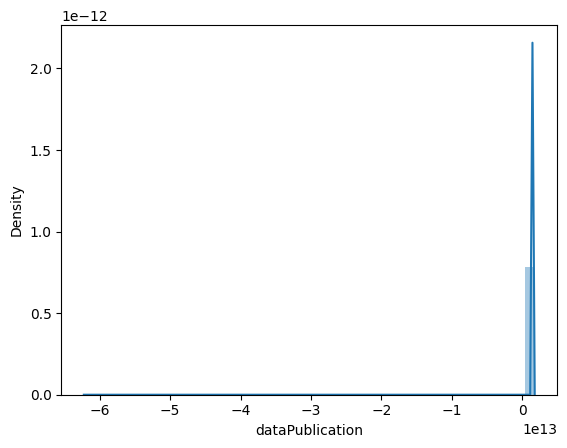

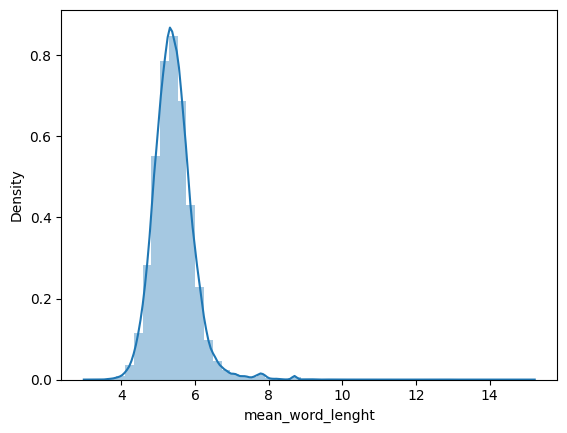

In [ ]:
for col in df2.select_dtypes('float'):
  plt.figure()
  sns.distplot(df[col])

Le nuage de points est généralement distribué autour de la moyenne, avec une certaine dispersion. La dispersion est indiquée par la taille des points. Les points les plus gros sont les plus dispersés.C'est à dire que à un certain temps il y avait un beaucoup d'nformation.

Le nuage de points présente une forme légèrement asymétrique, avec une queue plus longue vers la droite. Cela indique que à certains temps il y avait une masse d'information.


Le graphique montre que la moyenne de la longueur des mots est généralement plus élevée pour les phrases plus longues. Cela est probablement dû au fait que les phrases plus longues ont tendance à contenir des mots plus complexes et plus de détails.

Le graphique présente également une légère forme de courbe, avec une augmentation plus rapide de la moyenne de la longueur des mots pour les phrases courtes. Cela peut être dû au fait que les phrases courtes ont tendance à contenir des mots plus courants et plus simples.



Vérifions d'abord s'il y a des duplicatas.

In [ ]:
df2.duplicated().value_counts()


False    93636
True        69
dtype: int64

In [ ]:
df3=df2.copy()

In [ ]:
df3.drop_duplicates(inplace=True)

In [ ]:
df3.duplicated().value_counts()

False    93636
dtype: int64

À présent, analysons les fréquences de publication dans le tableau.

Pour cela, nous allons supprimer les colonnes qui ne sont pas nécessaires et enregistrer le tout dans un nouveau dataframe.

In [ ]:
df4=df1.drop(["dataPublication", "longueur_moyenne_phrase","Word_count","mean_word_lenght"], axis=1)

In [ ]:
df4

titre                                           contenue  \
0                 RALLYE  Un pilote malgache à suivre de près en France....   
1                 BETAFO  Betafo est devenu un passage obligatoire des t...   
2              AUTOROUTE  La société civile demande aussi aux responsabl...   
3                VANILLE  Compte tenu du poids prépondérant de la Vanill...   
4          PAPE FRANCOIS  Le Pape François se rend au Monastère des Cart...   
...                  ...                                                ...   
93700  INDUSTRIALISATION  Le Conseil National pour l’Industrialisation d...   
93701   QUALITE DE L'AIR  A Antananarivo, une dégradation de la qualité ...   
93702           PLF 2024  Les organisations de la société civile interpe...   
93703       TEMPERATURES  Cette semaine, les températures maximales conn...   
93704  DROIT DES ENFANTS  Selon le rapport de l’UNICEF « Index des risqu...   

         temps_publication  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  
...                    ...  
93700  2023-11-21 13:00:00  
93701  2023-11-21 14:00:00  
93702  2023-11-21 15:00:00  
93703  2023-11-21 16:00:00  
93704  2023-11-21 17:00:00  

[93705 rows x 3 columns]

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93705 entries, 0 to 93704
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   titre              93705 non-null  object
 1   contenue           93705 non-null  object
 2   temps_publication  93665 non-null  object
dtypes: object(3)
memory usage: 2.9+ MB


Toutes nos variables sont actuellement de type objet. Nous constatons qu'il n'y a pas de données manquantes, nous pouvons donc passer à l'étape suivante. Pour analyser les fréquences de termes, il est essentiel de prétraiter les données textuelles.

Nous allons donc procéder au nettoyage des données en utilisant des expressions régulières (regex).

In [ ]:
def clean(review):
  #transformant les en minuscule d'abord
  stopwords=list(STOP_WORDS)
  review = review.lower()
  #review = nlp.Defaults.stop_words
  pattern = r"\b(" + "|".join(stopwords) + r")\b"
  review = re.sub(pattern, " ", review)
  review=re.sub("[^\w]+"," ",review)
  return review

In [ ]:
df4['contenue']=df4['contenue'].apply(clean)
df4.head()

titre                                           contenue  \
0         RALLYE   pilote malgache france jeunes pilotes brillé ...   
1         BETAFO  betafo devenu passage obligatoire trafiquants ...   
2      AUTOROUTE   société civile demande responsables concernés...   
3        VANILLE  compte tenu poids prépondérant vanille madagas...   
4  PAPE FRANCOIS   pape françois monastère cartes déchaussés amp...   

  temps_publication  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN

In [ ]:
df4['contenue'].head(0)

Series([], Name: contenue, dtype: object)

Nous allons diviser à nouveau les lignes dans le tableau.

In [ ]:
def corpus(text):
    text_list = text.split()
    return text_list

In [ ]:
df4['liste_de_contenue'] = df4['contenue'].apply(corpus)
df4.head(10)

titre  \
0                     RALLYE   
1                     BETAFO   
2                  AUTOROUTE   
3                    VANILLE   
4              PAPE FRANCOIS   
5                 COMMUNALES   
6  MARINE NATIONALE MALGACHE   
7                   CAN 2021   
8            GUILLAUME GOMEZ   
9            GUILLAUME GOMEZ   

                                            contenue temps_publication  \
0   pilote malgache france jeunes pilotes brillé ...               NaN   
1  betafo devenu passage obligatoire trafiquants ...               NaN   
2   société civile demande responsables concernés...               NaN   
3  compte tenu poids prépondérant vanille madagas...               NaN   
4   pape françois monastère cartes déchaussés amp...               NaN   
5  rina andriamasinoro candidat communales antana...               NaN   
6   atelier semaines gestion ressources humaines ...               NaN   
7   prochaines journées éliminatoires coupe afriq...               NaN   
8   fondation ecole felix organise programme form...               NaN   
9   fondation ecole felix organise programme form...               NaN   

                                   liste_de_contenue  
0  [pilote, malgache, france, jeunes, pilotes, br...  
1  [betafo, devenu, passage, obligatoire, trafiqu...  
2  [société, civile, demande, responsables, conce...  
3  [compte, tenu, poids, prépondérant, vanille, m...  
4  [pape, françois, monastère, cartes, déchaussés...  
5  [rina, andriamasinoro, candidat, communales, a...  
6  [atelier, semaines, gestion, ressources, humai...  
7  [prochaines, journées, éliminatoires, coupe, a...  
8  [fondation, ecole, felix, organise, programme,...  
9  [fondation, ecole, felix, organise, programme,...

Pour une meilleure visualisation de la liste des critiques, nous allons regrouper tous les mots.

In [ ]:
corpus = []
for i in trange(df4.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += df4['liste_de_contenue'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 93705/93705 [00:00<00:00, 140562.61it/s]


3185945

Cela s'est déroulé avec succès, et nous avons obtenu le total des mots, qui est de 3 166 464.

À présent, comptons les 10 premiers mots qui se répètent le plus.

In [ ]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('madagascar', 35763),
 ('été', 27738),
 ('nationale', 13427),
 ('ministère', 12791),
 ('antananarivo', 11579),
 ('président', 9740),
 ('ministre', 8936),
 ('niveau', 8892),
 ('région', 8716),
 ('19', 8652)]

Parfait, maintenant que nous avons tous les nombres de mots, analysons cela graphiquement.

In [ ]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

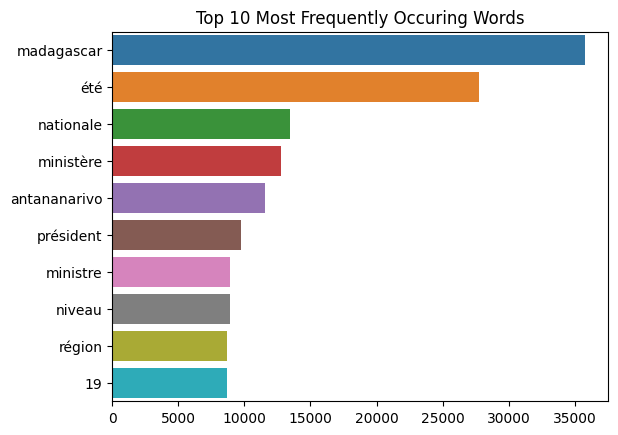

In [ ]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

Le mot 'Madagascar' se répète le plus souvent, suivi du mot 'été', tandis que d'autres mots restent dans la moyenne. Le mot 'cadre' semble être le moins fréquent.

Maintenant que nous avons examiné les mots, passons à l'analyse des n-grams les plus fréquents.


Un n-gramme est une séquence de n mots dans un texte. La plupart des mots pris isolément ne peuvent pas présenter le contexte entier. Typiquement, les adverbes tels que "most" ou "very" sont utilisés pour modifier les verbes et les adjectifs. Par conséquent, les n-grammes aident à analyser les phrases et non pas seulement les mots, ce qui peut conduire à de meilleurs insights.

In [ ]:
def n_grams(n: int, text: str):
  if n>1:
    pattern =" ".join(["\w{2,}"]*n)
  else:
    text="[A-Za-z]{2,}"
  n_grams = re.findall(pattern,text)
  return n_grams


In [ ]:
df4['frequency_bigrams'] = df4['contenue'].apply(lambda x: n_grams(2,x))


In [ ]:
df4['frequency_trigrams'] = df4['contenue'].apply(lambda x: n_grams(3,x))

In [ ]:
df4.head()

titre                                           contenue  \
0         RALLYE   pilote malgache france jeunes pilotes brillé ...   
1         BETAFO  betafo devenu passage obligatoire trafiquants ...   
2      AUTOROUTE   société civile demande responsables concernés...   
3        VANILLE  compte tenu poids prépondérant vanille madagas...   
4  PAPE FRANCOIS   pape françois monastère cartes déchaussés amp...   

  temps_publication                                  liste_de_contenue  \
0               NaN  [pilote, malgache, france, jeunes, pilotes, br...   
1               NaN  [betafo, devenu, passage, obligatoire, trafiqu...   
2               NaN  [société, civile, demande, responsables, conce...   
3               NaN  [compte, tenu, poids, prépondérant, vanille, m...   
4               NaN  [pape, françois, monastère, cartes, déchaussés...   

                                   frequency_bigrams  \
0  [pilote malgache, france jeunes, pilotes brill...   
1  [betafo devenu, passage obligatoire, trafiquan...   
2  [société civile, demande responsables, concern...   
3  [compte tenu, poids prépondérant, vanille mada...   
4  [pape françois, monastère cartes, déchaussés a...   

                                  frequency_trigrams  
0  [pilote malgache france, jeunes pilotes brillé...  
1  [betafo devenu passage, obligatoire trafiquant...  
2  [société civile demande, responsables concerné...  
3  [compte tenu poids, prépondérant vanille madag...  
4  [pape françois monastère, cartes déchaussés am...

Nous allons vizualiser cela graphiquement.

In [ ]:
bigrams = []
for i in trange(df4.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    bigrams += df4['frequency_bigrams'][i]
len(bigrams)



100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 93705/93705 [00:00<00:00, 143450.45it/s]


1519840

Cela s'est passé avec succès et on a obtenue la total des mots qui est 810421.

In [ ]:
mostCommon = Counter(bigrams).most_common(10)
mostCommon

[('covid 19', 2824),
 ('président république', 1970),
 ('commune urbaine', 1564),
 ('lutte contre', 1467),
 ('mise place', 1172),
 ('hery rajaonarimampianina', 1120),
 ('andry rajoelina', 1091),
 ('assemblée nationale', 1029),
 ('milliards ariary', 1001),
 ('forces ordre', 978)]

In [ ]:
bigrams = []
freq = []
for bigram, count in mostCommon:
    bigrams.append(bigram)
    freq.append(count)

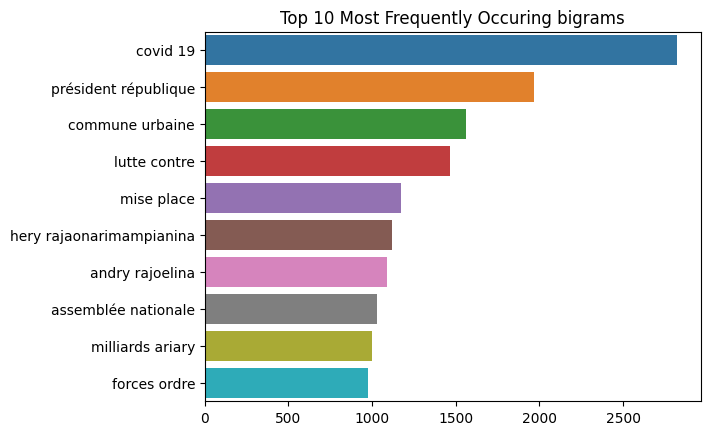

In [ ]:
sns.barplot(x=freq, y=bigrams)
plt.title('Top 10 Most Frequently Occuring bigrams')
plt.show()

On remarque que le bigrams covid 19 ce repète le plus cela semble normal car il pendant le confinement il y avait une grande expensiion d' actualité le concernant cela , c'est l'un des évènements qui à marquer le monde entier en générale . dans la deuxième place il y a le mots lutte contre , vue de nombreux maladies cela semble normal que ce mots se répète .Ce sont les mots le plus fréquent.

Supposons que le nombre de bigrams soit suffisant pour définir notre fréquence de mots.

 II . Conclusion :

En conclusion, notre analyse exploratoire des données nous a permis d'obtenir des informations approfondies sur le contenu textuel du site Orange Actu à Madagascar, en mettant en lumière les mots et les n-grams les plus fréquents. Cette compréhension préliminaire jettera les bases pour des analyses plus avancées et spécifiques selon les besoins.


-------------------------------------------------

Référence:

- Cette rédaction a été assistée par ChatGPT , un modèle de langage développé par OpenAI, basé sur l'architecture GPT-3.5. Pour plus d'informations sur ChatGPT, veuillez visiter le site d'OpenAI.

- Certains des interprétations du graphe a été faite par BARD.


